# MODELOS DE PREDICCION DE PEPTIDOS ANTIMICROBIANOS

Grupo 2
--

#### - Edwin Villarraga
#### - Mauricio Zapata
#### - Lesty Delgado
#### - Santiago Giraldo
#### - Stephany Gloria

Enunciado del problema
==

En las últimas décadas, la resistencia bacteriana se ha convertido en una de las problemáticas más graves
a nivel mundial. Un agravante de esta problemática es que existe un declive en la búsqueda y desarrollo
de nuevas moléculas antimicrobianas que puedan ser usadas contra bacterias resistentes a los
antibióticos actuales. En parte, la disminución del interés en la investigación y desarrollo de nuevos
antibióticos se debe tanto al costo y el tiempo que requieren las pruebas en laboratorio necesarias en la
generación de nuevas moléculas antimicrobianas, como al escaso retorno de la inversión que esta
representa para las empresas farmacéuticas.

Como parte de solución a la problemática, los péptidos antimicrobianos (o AMPs, de su sigla en inglés
Antimicrobial Peptides) han tomado importancia en el desarrollo de nuevos antibióticos por su rol como
agente inhibidor, no solo de bacterias sino también de virus, hongos y parásitos, entre otros (Porto et al.,
2017; Yoshida et al., 2018). Los AMPs son parte esencial de todos los organismos vivos y configuran la
primera línea de defensa contra bacterias, microbios y parásitos. Este tipo de péptidos causan la muerte
de las bacterias y los microbios, bien sea interfiriendo las funcionalidades de la membrana celular o
interrumpiendo sus funciones intracelulares (Brogden, 2005; Yeaman & Yount, 2003). De ahí la
importancia que tienen el determinar la capacidad antimicrobiana de un péptido.

Si bien la identificación de péptidos antimicrobianos se ha desarrollado de manera manual, en los últimos
años se ha venido realizando importantes avances en lo que respecta al uso de los algoritmos de
inteligencia artificial. Esto puede tener un impacto positivo en el contexto farmacéutico dado que el uso
de algoritmos de aprendizaje automático puede reducir los costos y el tiempo empleados en el proceso
de búsqueda y diseño de nuevas biomoléculas sintéticas para la producción de antibióticos.
Lo anterior, ha motivado a que los grupos de investigación en Biología Funcional e Investigación y
Desarrollo en Inteligencia Artificial (GIDIA), ambos de Universidad Nacional, sede Medellín, y el grupo de
investigación en Automática Electrónica y Ciencias Computacionales (AEyCC) del ITM, unan sus esfuerzos
en la búsqueda y construcción de soluciones computacionales que apoyen la investigación y desarrollo de
nuevas moléculas antimicrobianas.

Como resultado parcial se ha recopilado, de las diferentes bases de datos de péptidos disponibles,
péptidos que se han identificado que pertenecen a una de dos clases: antimicrobianos y NO-
antimicrobianos. Para dicho conjunto de péptidos se ha calculado aproximadamente 1700 descriptores a
partir de propiedades como la carga eléctrica, la hidrofobicidad, el momento hidrofóbico, el punto
isoeléctrico, la estructura primaria y otras características fisicoquímicas de los péptidos.


Para el ejercicio se entregan 3 archivos:

- Base de datos positiva, la cual contiene los péptidos antimicrobianos.
- Base de datos negativa, la cual contiene los péptidos NO antimicrobianos.
- Un conjunto de validación para determinar el desempeño de los algoritmos seleccionados como mejores y con base  en la cual se determinará el orden de la competencia.

La competencia tiene dos partes. El informe de ser entregado en formato pdf y la implementación debe
ser entregada en un solo Notebook de Jupyter.

Parte 1: Clasificación sin selección
-
 1. Cargue los archivos de los conjuntos de datos y aplique normalización.
 2. Divida el conjunto de datos en 2 subconjuntos: un conjunto con el **80%** de las muestras para el entrenamiento (training) y otro con el **20%** restante como conjunto de pruebas (testing).
 3. Entrene mínimo 3 técnicas de clasificación diferentes, haciendo ajuste a los hyperparámetros.
 4. El clasificador debe ser entrenado con los datos de entrenamiento de la partición. Se debe usar validación cruzada para la medición del desempeño.
 5. Use el conjunto de prueba para evaluar los clasificadores. Las métricas a usar son: matriz de confusión, precision, recall y F1-score.
 
Parte2: Clasificación con selección:
-
 1. Sobre el conjunto de entrenamiento, aplique un método de selección y un método de extracción (o transformación) para seleccionar las mejores características del conjunto de datos (se aplican de manera independiente sobre el conjunto de datos original normalizado).
 2. Utilizar los clasificadores de la Parte1 con el nuevo conjunto de características. Pueden realizar hypertunning.
 3. Use el conjunto de prueba para evaluar los clasificadores. Las métricas a usar son: matriz de confusión, precision, recall y F1-score.
 4. Compare estos resultados con los clasificadores de la parte anterior. ¿Qué hallazgos hay?
 
Entregables.
-
 1. Informe. Se debe presentar un informe, no mayor a 6 páginas, con la metodología usada para la solución del problema, además de una descripción, análisis y discusión de los resultados obtenidos y las conclusiones generales del proyecto.
 
**Nota:** se espera que en el informe se describa cada una las pruebas realizadas. ¿Qué técnicas de
machine learning exploró? ¿Cuál conjunto de hyperparámetros ajustó? Analizar los resultados
por cada métrica de cada una de las técnicas exploradas. Mostrar los tiempos de entrenamiento
para cada una de las técnicas usadas. ¿Qué pasos fueron los de mayor complejidad y retadores?
 2. Desarrollo. Notebook (*.ipynb) con la solución completa, desde la carga de los datos hasta la visualización de resultados. El notebook debe estar correctamente comentado y con descripciones amplias en las celdas de mayor relevancia para la solución.
 
Los entregables deben ser enviados al correo srobles@unal.edu.co hasta el 14 de marzo de 2020 hasta
las 11:59pm.

Asunto del correo: CRP – G2 - Taller 4 Competencia

**Nota:** Aquellas entregas que no cumplan con el asunto del correo, no se tendrán en cuenta.

**Nota:** En la revisión de los informes, es posible que se llamen a los grupos para sustentar el trabajo
realizado.

# <font color='#1C3552'>Parte 1</font>
# <font color='#1C3552'>Clasificación sin selección</font>

 ## <font color='#1C3552'>1.1 Cargue los archivos de los conjuntos de datos y aplique normalización</font>

## <font color='#1C3552'>1.1.1 importación de Librerias</font>

In [1]:
# librerias generales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import random
import time
import seaborn as sns
%matplotlib inline

# Librerias para la transformación de los conjuntos de datos
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# librerias de metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

# librerias para la validación cruzada y selección de las características
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_selection import SelectFromModel


# librerias de modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [2]:
# Parametrización de caracterísiticas del notebook
plt.style.use('ggplot')
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

## <font color='#1C3552'>1.1.2 Cargue de datos</font>

Los datos consisten en tres archivos csv. En  DatosPositivos2.csv están los peptidos con clasificación positiva, en el archivo DatosNegativos2 se tienen los peptidos negativos y en el archivo DatosValidacion2.csv se facilita un conjunto de datos para validar los modelos desarrollados enéste análisis.

In [3]:
#Se cargan los datos positivos
dataP = pd.read_csv('./Datos/DatosPositivos2.csv')

In [4]:
#Se cargan los datos negativos
dataN = pd.read_csv('./Datos/DatosNegativos2.csv')

## <font color='#1C3552'>1.1.3 Análisis Descriptivo de los Datos</font>

En este punto se analizara que tipo de datos contiene la muestra, cuales pueden ser descartados y las caractarísticas de los mismos.

In [5]:
print("El archivo con datos Positivos tiene {} filas y {} columnas".format(dataP.shape[0],dataP.shape[1]))
print("El archivo con datos Negativos tiene {} filas y {} columnas".format(dataN.shape[0],dataN.shape[1]))

El archivo con datos Positivos tiene 8322 filas y 1761 columnas
El archivo con datos Negativos tiene 13679 filas y 1760 columnas


In [6]:
# Verificación de campos
dataP.head(2)

Unnamed: 0             sequence  length  molecular_weight  charge  \
0           0  CGGYSGGWKRKRSTSYRCG      19           2109.36   4.859   
1           1     GIMISLMKKLAAHIAK      16           1725.22   3.094   

   charge_density  isoelectric_point     gravy  instability_index  \
0        0.002304          10.056702 -1.310526          73.031579   
1        0.001793          10.302063  0.887500          20.918750   

   aromaticity  aliphatic_index  boman_index  hydrophobic_ratio      A  \
0     0.157895            0.000     3.122105           0.105263   0.00   
1     0.000000          140.625    -0.685000           0.625000  18.75   

        R    N    D       C    E    Q       G     H      I     L       K  \
0  15.789  0.0  0.0  10.526  0.0  0.0  26.316  0.00   0.00   0.0  10.526   
1   0.000  0.0  0.0   0.000  0.0  0.0   6.250  6.25  18.75  12.5  18.750   

      M    F    P       S      T      W       Y    V    AA   AR   AN   AD  \
0   0.0  0.0  0.0  15.789  5.263  5.263  10.526  0.0  0.00  0.0  0.0  0.0   
1  12.5  0.0  0.0   6.250  0.000  0.000   0.000  0.0  6.67  0.0  0.0  0.0   

    AC   AE   AQ   AG    AH   AI   AL    AK   AM   AF   AP   AS   AT   AW  \
0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  6.67  0.0  0.0  6.67  0.0  0.0  0.0  0.0  0.0  0.0   

    AY   AV   RA   RR   RN   RD    RC   RE   RQ   RG   RH   RI   RL    RK  \
0  0.0  0.0  0.0  0.0  0.0  0.0  5.56  0.0  0.0  0.0  0.0  0.0  0.0  5.56   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.00   

    RM   RF   RP    RS   RT   RW   RY   RV   NA   NR   NN   ND   NC   NE   NQ  \
0  0.0  0.0  0.0  5.56  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    NG   NH   NI   NL   NK   NM   NF   NP   NS   NT   NW   NY   NV   DA   DR  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    DN   DD   DC   DE   DQ   DG   DH   DI   DL   DK   DM   DF   DP   DS   DT  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    DW   DY   DV   CA   CR   CN   CD   CC   CE   CQ     CG   CH   CI   CL  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  11.11  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00  0.0  0.0  0.0   

    CK   CM   CF   CP   CS   CT   CW   CY   CV   EA   ER   EN   ED   EC   EE  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    EQ   EG   EH   EI   EL   EK   EM   EF   EP   ES   ET   EW   EY   EV   QA  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    QR   QN   QD   QC   QE   QQ   QG   QH   QI   QL   QK   QM   QF   QP   QS  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    QT   QW   QY   QV   GA   GR   GN   GD   GC   GE   GQ     GG   GH    GI  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  11.11  0.0  0.00   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00  0.0  6.67   

    GL   GK   GM   GF   GP   GS   GT    GW    GY   GV   HA   HR   HN   HD  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.56  5.56  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.00  0.0  0.0  0.0  0.0  0.0   

    HC   HE   HQ   HG   HH    HI   HL   HK   HM   HF   HP   HS   HT   HW   HY  \
0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  6.67  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    HV    IA   IR   IN   ID   IC   IE 

In [7]:
# Análisis de las variables contenidas en el conjunto positivos
dataP.describe()

Unnamed: 0       length  molecular_weight       charge  \
count  8322.000000  8322.000000       8322.000000  8322.000000   
mean   4162.764840    17.960106       2066.565888     2.960491   
std    2404.195616     7.486211        805.508257     3.026472   
min       0.000000     6.000000        524.530000    -9.060000   
25%    2081.250000    12.000000       1446.757500     0.996000   
50%    4162.500000    17.000000       1949.305000     2.995000   
75%    6243.750000    23.000000       2588.865000     4.992750   
max    8326.000000    35.000000       4727.630000    21.991000   

       charge_density  isoelectric_point        gravy  instability_index  \
count     8322.000000        8322.000000  8322.000000        8322.000000   
mean         0.001457           9.387176    -0.137653          38.839221   
std          0.001437           2.414180     0.995135          49.654050   
min         -0.007838           3.259827    -4.380000         -71.779167   
25%          0.000542           8.333801    -0.756454           6.539423   
50%          0.001402          10.001404    -0.065045          28.056346   
75%          0.002495          11.000916     0.530769          57.846154   
max          0.006660          13.278748     3.523529         486.777778   

       aromaticity  aliphatic_index  boman_index  hydrophobic_ratio  \
count  8322.000000      8322.000000  8322.000000        8322.000000   
mean      0.116715        94.166338     1.350943           0.415836   
std       0.112488        51.713790     1.933077           0.155374   
min       0.000000         0.000000    -3.858235           0.000000   
25%       0.038462        55.714286     0.018889           0.333333   
50%       0.090909        92.500000     1.092083           0.428571   
75%       0.160000       130.000000     2.476471           0.523810   
max       0.833333       309.411765    13.046000           1.000000   

                 A            R           N            D            C  \
count  8322.000000  8322.000000  8322.00000  8322.000000  8322.000000   
mean      7.388295     9.107422     2.53841     1.903834     4.229614   
std       9.041099    12.079476     4.25807     4.382002     7.831948   
min       0.000000     0.000000     0.00000     0.000000     0.000000   
25%       0.000000     0.000000     0.00000     0.000000     0.000000   
50%       5.263000     4.762000     0.00000     0.000000     0.000000   
75%      11.429000    14.286000     4.76200     2.857000     6.061000   
max      90.000000    83.333000    33.33300    85.714000    50.000000   

                 E            Q            G            H            I  \
count  8322.000000  8322.000000  8322.000000  8322.000000  8322.000000   
mean      2.057844     2.200529     6.985417     2.079110     6.082167   
std       4.518366     4.412331     7.668295     4.807971     7.020435   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     5.714000     0.000000     4.762000   
75%       3.030000     3.333000    11.111000     0.000000    10.000000   
max      50.000000    42.857000    80.000000    61.905000    61.538000   

                 L            K            M            F            P  \
count  8322.000000  8322.000000  8322.000000  8322.000000  8322.000000   
mean     11.976253    12.879966     1.241821     5.027459     4.275250   
std      11.434855    12.690132     3.066756     6.898305     7.165815   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.333000     0.000000     0.000000     0.000000     0.000000   
50%       9.677000    10.000000     0.000000     2.941000     0.000000   
75%      16.667000    18.750000     0.000000     8.333000     6.667000   
max      70.000000    75.000000    40.000000    83.333000    67.857000   

                 S            T            W            Y            V  \
count  8322.000000  83

El conjunto de datos positivos tiene 1761 columnas, se destaca la primera de ellas por ser una columna sin nombre.  Si semira la descripción hecha por python, es un conteo, es decir un indice, razón por la cual se elimina del conjunto de datos.

In [8]:
print('El tipo de la columna sequence es {}'.format(dataP['sequence'].dtypes))
print('El tipo de la columna sequence es {}'.format(dataP['length'].dtypes))
print('El tipo de la columna sequence es {}'.format(dataP['class'].dtypes))

El tipo de la columna sequence es object
El tipo de la columna sequence es int64
El tipo de la columna sequence es int64


Las columnas *sequence, length y class* no son flotantes como las demás. La primera es del tipo object y las otras dos son del tipo int64.  La columna *sequence* es la secuencia es la representación de la cadena de amínoacidos que representa cada peptido.  La columna *length* corresponde a la cantidad de aminoácidos en la cadena. Las otras columnas parecen estar relacionadas con propiedades biofísicas o químicas de los peptidos y no se muestran acá por la extensión en su publición en éste notebook pero puede ser facilmente verificable con el comando positivos.dtypes

Dado que lenght y class son variables enteras que no tienen mucha variación, es posible inferir que son del tipo categorícas.  Esto se puede verficar en el siguiente gráfico.

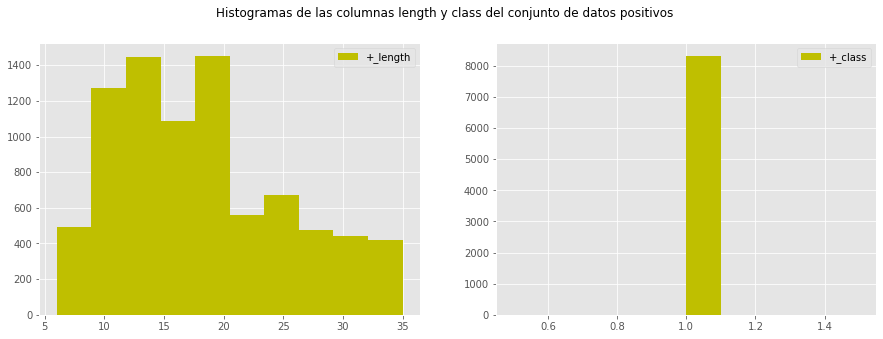

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Histogramas de las columnas length y class del conjunto de datos positivos')
ax[0].hist([dataP['length']],label=['+_length'], color='y')
ax[0].legend()
ax[1].hist([dataP['class']],label=['+_class'], color='y')
ax[1].legend()
plt.show()


In [10]:
# Se elimina la primer columna pues no aporta nada al análisis
dataP = dataP.drop(dataP.columns[0], axis=1, inplace=False)

In [11]:
# Verificación de campos
dataP.head(2)

sequence  length  molecular_weight  charge  charge_density  \
0  CGGYSGGWKRKRSTSYRCG      19           2109.36   4.859        0.002304   
1     GIMISLMKKLAAHIAK      16           1725.22   3.094        0.001793   

   isoelectric_point     gravy  instability_index  aromaticity  \
0          10.056702 -1.310526          73.031579     0.157895   
1          10.302063  0.887500          20.918750     0.000000   

   aliphatic_index  boman_index  hydrophobic_ratio      A       R    N    D  \
0            0.000     3.122105           0.105263   0.00  15.789  0.0  0.0   
1          140.625    -0.685000           0.625000  18.75   0.000  0.0  0.0   

        C    E    Q       G     H      I     L       K     M    F    P  \
0  10.526  0.0  0.0  26.316  0.00   0.00   0.0  10.526   0.0  0.0  0.0   
1   0.000  0.0  0.0   6.250  6.25  18.75  12.5  18.750  12.5  0.0  0.0   

        S      T      W       Y    V    AA   AR   AN   AD   AC   AE   AQ   AG  \
0  15.789  5.263  5.263  10.526  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1   6.250  0.000  0.000   0.000  0.0  6.67  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     AH   AI   AL    AK   AM   AF   AP   AS   AT   AW   AY   AV   RA   RR  \
0  0.00  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  6.67  0.0  0.0  6.67  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    RN   RD    RC   RE   RQ   RG   RH   RI   RL    RK   RM   RF   RP    RS  \
0  0.0  0.0  5.56  0.0  0.0  0.0  0.0  0.0  0.0  5.56  0.0  0.0  0.0  5.56   
1  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.00   

    RT   RW   RY   RV   NA   NR   NN   ND   NC   NE   NQ   NG   NH   NI   NL  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    NK   NM   NF   NP   NS   NT   NW   NY   NV   DA   DR   DN   DD   DC   DE  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    DQ   DG   DH   DI   DL   DK   DM   DF   DP   DS   DT   DW   DY   DV   CA  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    CR   CN   CD   CC   CE   CQ     CG   CH   CI   CL   CK   CM   CF   CP  \
0  0.0  0.0  0.0  0.0  0.0  0.0  11.11  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0   0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    CS   CT   CW   CY   CV   EA   ER   EN   ED   EC   EE   EQ   EG   EH   EI  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    EL   EK   EM   EF   EP   ES   ET   EW   EY   EV   QA   QR   QN   QD   QC  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    QE   QQ   QG   QH   QI   QL   QK   QM   QF   QP   QS   QT   QW   QY   QV  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    GA   GR   GN   GD   GC   GE   GQ     GG   GH    GI   GL   GK   GM   GF  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  11.11  0.0  0.00  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00  0.0  6.67  0.0  0.0  0.0  0.0   

    GP   GS   GT    GW    GY   GV   HA   HR   HN   HD   HC   HE   HQ   HG  \
0  0.0  0.0  0.0  5.56  5.56  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.00  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    HH    HI   HL   HK   HM   HF   HP   HS   HT   HW   HY   HV    IA   IR  \
0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0   
1  0.0  6.67  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  6.67  0.0   

    IN   ID   IC   IE   IQ   IG   IH 

In [12]:
# Verificación de campos del los datos negativos
dataN.head(2)

sequence  length  molecular_weight  charge  charge_density  \
0  MAATRNK       7            790.93   1.996        0.002524   
1  MKMDGLR       7            850.06   0.996        0.001172   

   isoelectric_point     gravy  instability_index  aromaticity  \
0          11.000305 -1.014286          77.657143          0.0   
1           8.497986 -0.671429          82.657143          0.0   

   aliphatic_index  boman_index  hydrophobic_ratio       A       R       N  \
0        28.571429     3.387143           0.428571  28.571  14.286  14.286   
1        55.714286     2.661429           0.428571   0.000  14.286   0.000   

        D    C    E    Q       G    H    I       L       K       M    F    P  \
0   0.000  0.0  0.0  0.0   0.000  0.0  0.0   0.000  14.286  14.286  0.0  0.0   
1  14.286  0.0  0.0  0.0  14.286  0.0  0.0  14.286  14.286  28.571  0.0  0.0   

     S       T    W    Y    V     AA   AR   AN   AD   AC   AE   AQ   AG   AH  \
0  0.0  14.286  0.0  0.0  0.0  16.67  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0   0.000  0.0  0.0  0.0   0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    AI   AL   AK   AM   AF   AP   AS     AT   AW   AY   AV   RA   RR     RN  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  16.67  0.0  0.0  0.0  0.0  0.0  16.67   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00  0.0  0.0  0.0  0.0  0.0   0.00   

    RD   RC   RE   RQ   RG   RH   RI   RL   RK   RM   RF   RP   RS   RT   RW  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    RY   RV   NA   NR   NN   ND   NC   NE   NQ   NG   NH   NI   NL     NK  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  16.67   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00   

    NM   NF   NP   NS   NT   NW   NY   NV   DA   DR   DN   DD   DC   DE   DQ  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      DG   DH   DI   DL   DK   DM   DF   DP   DS   DT   DW   DY   DV   CA  \
0   0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  16.67  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    CR   CN   CD   CC   CE   CQ   CG   CH   CI   CL   CK   CM   CF   CP   CS  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    CT   CW   CY   CV   EA   ER   EN   ED   EC   EE   EQ   EG   EH   EI   EL  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    EK   EM   EF   EP   ES   ET   EW   EY   EV   QA   QR   QN   QD   QC   QE  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    QQ   QG   QH   QI   QL   QK   QM   QF   QP   QS   QT   QW   QY   QV   GA  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    GR   GN   GD   GC   GE   GQ   GG   GH   GI     GL   GK   GM   GF   GP  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  16.67  0.0  0.0  0.0  0.0   

    GS   GT   GW   GY   GV   HA   HR   HN   HD   HC   HE   HQ   HG   HH   HI  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    HL   HK   HM   HF   HP   HS   HT   HW   HY   HV   IA   IR   IN   ID   IC  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    IE   IQ   IG   IH   II   IL

In [13]:
# Análisis de las variables contenidas en el conjunto negativos
dataN.describe()

length  molecular_weight        charge  charge_density  \
count  13679.000000      13679.000000  13679.000000    13679.000000   
mean      18.412749       2161.242266      0.259789        0.000096   
std        7.382712        866.052788      2.114870        0.001005   
min        6.000000        472.450000    -13.894000       -0.005053   
25%       13.000000       1473.660000     -1.003000       -0.000548   
50%       18.000000       2050.390000      0.094000        0.000035   
75%       24.000000       2771.595000      1.193000        0.000745   
max       35.000000       4678.560000     21.996000        0.005005   

       isoelectric_point         gravy  instability_index   aromaticity  \
count       13679.000000  13679.000000       13679.000000  13679.000000   
mean            7.066701     -0.235833          41.070656      0.136763   
std             2.324064      0.817930          33.374343      0.093895   
min             3.124573     -3.814286         -60.133333      0.000000   
25%             5.152161     -0.760000          17.563636      0.071429   
50%             6.737732     -0.271429          37.566667      0.125000   
75%             8.885742      0.250000          60.571429      0.200000   
max            13.322205      3.550000         334.142424      0.666667   

       aliphatic_index   boman_index  hydrophobic_ratio             A  \
count     13679.000000  13679.000000       13679.000000  13679.000000   
mean         69.344609      1.421032           0.386047      5.886243   
std          38.296591      1.429600           0.132990      6.398658   
min           0.000000     -4.168333           0.000000      0.000000   
25%          43.333333      0.512917           0.300000      0.000000   
50%          65.000000      1.413529           0.380952      5.000000   
75%          91.764706      2.298056           0.461538      9.375000   
max         267.500000     10.167143           1.000000     67.742000   

                  R             N             D             C             E  \
count  13679.000000  13679.000000  13679.000000  13679.000000  13679.000000   
mean       5.711747      4.815647      4.898889      4.089485      4.799352   
std        6.230791      5.645303      5.720910      5.520579      5.643512   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        5.000000      3.846000      4.000000      0.000000      3.846000   
75%        9.091000      8.000000      8.333000      7.143000      8.000000   
max       67.742000     50.000000     50.000000     50.000000     50.000000   

                  Q             G             H             I             L  \
count  13679.000000  13679.000000  13679.000000  13679.000000  13679.000000   
mean       1.358484      5.694037      4.339279      5.328513      6.799124   
std        3.470192      6.257744      5.843168      5.891358      6.813283   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      4.762000      0.000000      4.348000      5.882000   
75%        0.000000      9.091000      7.407000      8.571000     10.526000   
max       73.333000     55.556000     52.632000     40.000000     50.000000   

                  K             M             F             P             S  \
count  13679.000000  13679.000000  13679.000000  13679.000000  13679.000000   
mean       5.095702      5.570705      5.358025      5.049356      5.894368   
std        5.809845      5.399445      6.025968      5.827212      6.172058   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.167000      5.263000      4.762000      4.000000      5.000000   
75%        8.333000      8.333000      8.333000      8.333000 

La estructura es igual a la del conjunto de datos positivos, y no hay que eliminar ninguna columna, tiene 1760 columnas.  Se puede verificar que los nombres de los encabezados son los mismos para ambos conjuntos de datos:

In [14]:
dataP.columns.intersection(dataP.columns)

Index(['sequence', 'length', 'molecular_weight', 'charge', 'charge_density',
       'isoelectric_point', 'gravy', 'instability_index', 'aromaticity',
       'aliphatic_index',
       ...
       'embed_2_91', 'embed_2_92', 'embed_2_93', 'embed_2_94', 'embed_2_95',
       'embed_2_96', 'embed_2_97', 'embed_2_98', 'embed_2_99', 'class'],
      dtype='object', length=1760)

In [15]:
dataP.columns.difference(dataP.columns)

Index([], dtype='object')

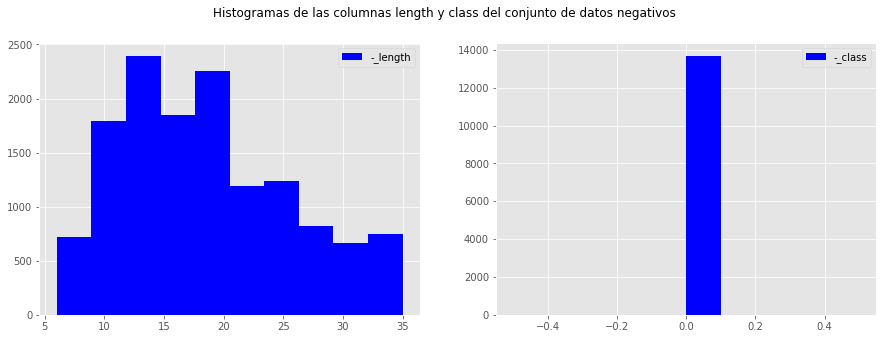

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Histogramas de las columnas length y class del conjunto de datos negativos')
ax[0].hist([dataN['length']],label=['-_length'], color='b')
ax[0].legend()
ax[1].hist([dataN['class']],label=['-_class'], color='b')
ax[1].legend()
plt.show()

Al comparar ambos gráficos (positivos y negativos) se puede inferir los siguiente:  Ambos conjuntos tienen cadenas de peptidos entre 6 y 35 aminoácidos, y que la columna clases es quien diferencia o etiqueta ambos conjuntos de datos entre los peptidos positivos (1) y negativos(2), por lo que no hay necesidad de crear una columna adicional para etiquetar estos conjuntos.  El siguiente paso es anexar ambos conjuntos y conformar uno solo para el análisis.

In [17]:
frames = [dataN, dataP]
data = pd.concat(frames,ignore_index=True)

In [18]:
# Se evalua si existen secuencias duplicadas en el conjunto de datos completo
len_id=data['sequence'].unique()

In [19]:
# Longitud de secuencias unicas
len(len_id)

21920

In [20]:
# longitud del dataframe
len(data)

22001

De los dos calculos anteriores se puede deducir que existen secuencias que están repetidas en el conjunto de datos.

In [21]:
len(data)-len(len_id)

81

Existen 81 datos de con sequence repetida.  Por esta razón se eliminar los datos de la columna duplicados independiente de si las demás variables sean distintas, con eso se busca evitar un sesgo o distorsión en la muestra.

In [22]:
data.drop_duplicates(subset='sequence',keep='first',inplace=True)
data.reset_index(drop=True, inplace=True)

In [23]:
#Se extrae una lista de las variables que contengan valores nulos
vars_with_na = [var for var in data.columns if data[var].isnull().sum()>1]
vars_with_na

[]

Significa que no hay variables con valores nulos

In [24]:
data.shape

(21920, 1760)

In [25]:
# lista de variables numericas
num_vars = [var for var in data.columns if data[var].dtypes != 'O']  #'O' significa python objects
len(num_vars)

1759

Todas las variables son numéricas excepto 1, que es la sequencia, que actua como identificador de la molécula

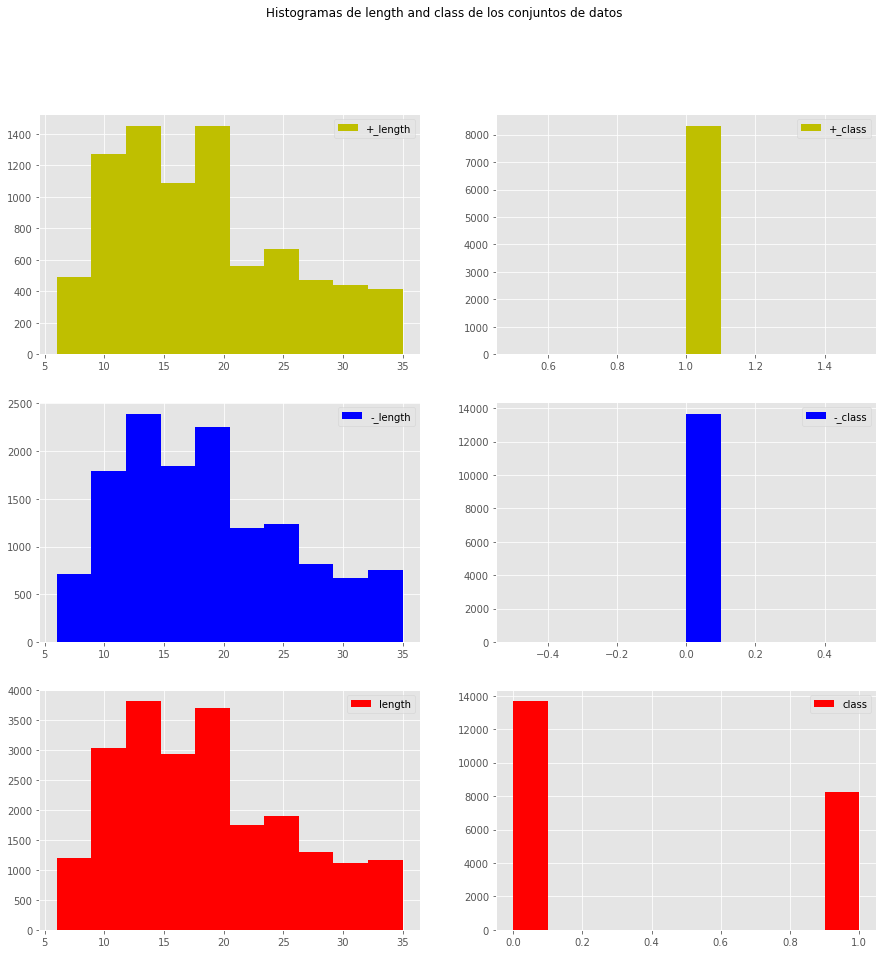

In [26]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))
fig.suptitle('Histogramas de length and class de los conjuntos de datos')
ax[0][0].hist([dataP['length']],label=['+_length'], color='y')
ax[0][0].legend()
ax[0][1].hist([dataP['class']],label=['+_class'], color='y')
ax[0][1].legend()
ax[1][0].hist([dataN['length']],label=['-_length'], color='b')
ax[1][0].legend()
ax[1][1].hist([dataN['class']],label=['-_class'], color='b')
ax[1][1].legend()
ax[2][0].hist([data['length']],label=['length'],color='r')
ax[2][0].legend()
ax[2][1].hist([data['class']],label=['class'],color='r')
ax[2][1].legend()

plt.show()

## <font color='#1C3552'>1.1.4 Escalamiento</font>

En este punto se hará un preproceso adicional a la muestra de datos, haciendo un rearreglo de los datos aleatoriamente de los indices del dataframe para evitar que en el momento de los análisis haya un sesgo en el momento de partir el conjunto de datos en los subconjuntos de entrenamiento y pruebas.  Después se elimina la columna secuencia del dataframe para dejar solo variables númericas, y por útimo se escalaran las variables dependientes de la muestra.

In [27]:
random.seed(2020)
list_idx = random.sample(range(0, len(data)), len(data))

In [28]:
# Sanity check - se verifica que no se creen duplicados en la lista
set([x for x in list_idx if list_idx.count(x) > 1])

set()

In [29]:
data = data.reindex(list_idx).reset_index(drop=True)

In [30]:
data.head(10)

sequence  length  molecular_weight  charge  \
0                      PKLLKTFLSKWKKIG      15           1787.25   4.995   
1        ALWTTMLKKLGKMALHAGKAALGAAADTI      29           2953.58   3.094   
2                           WATICLMADG      10           1080.28  -1.071   
3                            RCLCRRRVC       9           1164.47   3.793   
4                       LKLKNIVSWAKKVL      14           1640.07   3.995   
5  RWKVFKKIEKVGRNIRDGVIKAAPAIEVLGQAKAL      35           3903.68   5.998   
6      ASDCRTIFWEGNNPTTVYRYCPKVVIFSKAV      31           3566.08   1.861   
7                         AKRYYGYKRKFY      12           1642.90   4.992   
8                 GFGSPNNYQSHRHSKSIPGR      20           2226.38   3.192   
9              KHTLPDLPYDFGALQPHISAEIM      23           2593.96  -1.805   

   charge_density  isoelectric_point     gravy  instability_index  \
0        0.002795          10.605164 -0.346667           0.580000   
1        0.001048          10.001770  0.524138           5.386207   
2       -0.000991           3.799866  1.080000          17.080000   
3        0.003257          10.437927 -0.277778         157.577778   
4        0.002436          10.477722  0.378571          -0.385714   
5        0.001536          10.637268 -0.111429          61.851429   
6        0.000522           8.826111 -0.051613          -0.835484   
7        0.003039          10.119080 -1.808333          80.517500   
8        0.001434          11.000427 -1.570000          61.630000   
9       -0.000696           5.212830 -0.156522          73.108696   

   aromaticity  aliphatic_index  boman_index  hydrophobic_ratio       A  \
0     0.133333       104.000000     0.519333           0.333333   0.000   
1     0.034483       108.275862    -0.364138           0.551724  27.586   
2     0.100000        98.000000    -0.907000           0.600000  20.000   
3     0.000000        75.555556     5.208889           0.555556   0.000   
4     0.071429       160.000000     0.024286           0.500000   7.143   
5     0.057143       114.285714     1.420571           0.457143  14.286   
6     0.161290        69.032258     1.391290           0.387097   6.452   
7     0.416667         8.333333     3.443333           0.166667   8.333   
8     0.100000        19.500000     3.327500           0.100000   0.000   
9     0.086957        93.478261     0.707826           0.391304   8.696   

        R       N       D       C      E      Q       G       H       I  \
0   0.000   0.000   0.000   0.000  0.000  0.000   6.667   0.000   6.667   
1   0.000   0.000   3.448   0.000  0.000  0.000  10.345   3.448   3.448   
2   0.000   0.000  10.000  10.000  0.000  0.000  10.000   0.000  10.000   
3  44.444   0.000   0.000  33.333  0.000  0.000   0.000   0.000   0.000   
4   0.000   7.143   0.000   0.000  0.000  0.000   0.000   0.000   7.143   
5   8.571   2.857   2.857   0.000  5.714  2.857   8.571   0.000  11.429   
6   6.452   6.452   3.226   6.452  3.226  0.000   3.226   0.000   6.452   
7  16.667   0.000   0.000   0.000  0.000  0.000   8.333   0.000   0.000   
8  10.000  10.000   0.000   0.000  0.000  5.000  15.000  10.000   5.000   
9   0.000   0.000   8.696   0.000  4.348  4.348   4.348   8.696   8.696   

        L       K       M      F       P       S       T       W       Y  \
0  20.000  33.333   0.000  6.667   6.667   6.667   6.667   6.667   0.000   
1  17.241  13.793   6.897  0.000   0.000   0.000  10.345   3.448   0.000   
2  10.000   0.000  10.000  0.000   0.000   0.000  10.000  10.000   0.000   
3  11.111   0.000   0.000  0.000   0.000   0.000   0.000   0.000   0.000   
4  21.429  28.571   0.000  0.000   0.000   7.143   0.000   7.143   0.000   
5   5.714  17.143   0.000  2.857   2.857   0.000   0.000   2.857   0.000   
6   0.000   6.452   0.000  6.452   6.452   6.452   9.677   3.226   6.452   
7   0.000  25.000   0.000  8.333   0.000   0.000   0.000   0.000  33.333   
8   0.000   5.000   0.000  5.000  10.000  20.000   0.000   0.000   5.000   
9  13.043   4.348   4

In [31]:
data.tail(10)

sequence  length  molecular_weight  charge  \
21910  PLVFPSDEFDASISQVNEKINQSLAFIRKSDELLH      35           3988.43  -2.900   
21911                         GKWMSWLKHILK      12           1526.89   3.094   
21912                         VWGAEEYNAWYV      12           1486.58  -2.003   
21913                            VHAGCIRIF       9           1015.23   1.027   
21914                      YETIDRKAHCWKTRR      15           1963.23   3.028   
21915                      RDSNVTILPLRNMKD      15           1772.04   0.997   
21916             GCRFTVKPYIKRIQLHYKGKMWCG      24           2913.54   5.957   
21917                        LGTACSSTGETAR      13           1253.34  -0.070   
21918                 VKFNYYHNWDIFIDKTDKWN      20           2646.91   0.094   
21919                           RGRGRGRGRG      10           1084.20   4.996   

       charge_density  isoelectric_point     gravy  instability_index  \
21910       -0.000727           4.582458 -0.245714          35.568571   
21911        0.002026          10.302063 -0.325000         107.241667   
21912       -0.001347           3.794983 -0.275000          20.616667   
21913        0.001012           8.229675  1.355556           8.888889   
21914        0.001542           9.780945 -1.753333          47.593333   
21915        0.000563           8.745667 -0.786667          63.260000   
21916        0.002045          10.042664 -0.483333          40.104167   
21917       -0.000056           5.994934 -0.200000          38.984615   
21918        0.000036           6.717346 -1.110000          24.735000   
21919        0.004608          12.602112 -2.450000         -33.450000   

       aromaticity  aliphatic_index  boman_index  hydrophobic_ratio       A  \
21910     0.085714       100.285714     1.815714           0.400000   5.714   
21911     0.166667        97.500000     0.166667           0.333333   0.000   
21912     0.333333        65.000000     0.270000           0.333333  16.667   
21913     0.111111       130.000000    -0.145556           0.666667  11.111   
21914     0.133333        32.666667     4.732667           0.200000   6.667   
21915     0.000000        97.333333     3.395333           0.333333   0.000   
21916     0.166667        60.833333     1.385417           0.333333   0.000   
21917     0.000000        45.384615     1.887692           0.307692  15.385   
21918     0.300000        53.500000     2.287000           0.250000   0.000   
21919     0.000000         0.000000     6.990000           0.000000   0.000   

            R       N       D       C       E      Q       G       H       I  \
21910   2.857   5.714   8.571   0.000   8.571  5.714   0.000   2.857   8.571   
21911   0.000   0.000   0.000   0.000   0.000  0.000   8.333   8.333   8.333   
21912   0.000   8.333   0.000   0.000  16.667  0.000   8.333   0.000   0.000   
21913  11.111   0.000   0.000  11.111   0.000  0.000  11.111  11.111  22.222   
21914  20.000   0.000   6.667   6.667   6.667  0.000   0.000   6.667   6.667   
21915  13.333  13.333  13.333   0.000   0.000  0.000   0.000   0.000   6.667   
21916   8.333   0.000   0.000   8.333   0.000  4.167  12.500   4.167   8.333   
21917   7.692   0.000   0.000   7.692   7.692  0.000  15.385   0.000   0.000   
21918   0.000  15.000  15.000   0.000   0.000  0.000   0.000   5.000  10.000   
21919  50.000   0.000   0.000   0.000   0.000  0.000  50.000   0.000   0.000   

            L       K      M       F      P       S       T       W       Y  \
21910  11.429   5.714  0.000   8.571  5.714  14.286   0.000   0.000   0.000   
21911  16.667  25.000  8.333   0.000  0.000   8.333   0.000  16.667   0.000   
21912   0.000   0.000  0.000   0.000  0.000   0.000   0.000  16.667  16.667   
21913   0.000   0.000  0.000  11.111  0.000   0.000   0.000   0.000   0.000   
21914   0.000  13.333  0.000   0.000  0.000   0.000  13.333   6.667   6.667   
21915  13.333   6.667  6.667   0.000  6.667   6.667   6.667   0.000   0.000   
21916   4.167  16.667  4.167   4.167  4.167  

In [32]:
# Se excluye la variable sequence
data.drop(['sequence'], axis=1, inplace=True)

In [33]:
data.shape

(21920, 1759)

Una vez se reorganizó el indice del dataframe se separan la clase como etiqueta del conjunto de datos y el resto como las variables independientes del modelo.

In [34]:
Ydata = data['class']
Xdata = data.drop(['class'], axis=1, inplace=False) #se crea un dataframe sin la variable respuesta

print(Xdata.shape)
print(Ydata.shape)

(21920, 1758)
(21920,)


In [35]:
train_vars = [var for var in Xdata.columns]
all_vars = [var for var in data.columns]

Por último se reescalan los datos de las variables independientes de manera estándar o normal.

In [36]:
#ajuste del escalador
scaler = StandardScaler()  #se crea una instancia del escalador
scaler.fit(Xdata)

Xdata_std = pd.DataFrame(scaler.transform(Xdata), columns=train_vars) #  se ajusta el escalador a los datos de entrenamiento


In [37]:
type(Xdata_std)

pandas.core.frame.DataFrame

In [38]:
Xdata_std.head(2)

length  molecular_weight    charge  charge_density  isoelectric_point  \
0 -0.439160         -0.403000  1.314285        1.606537           1.016471   
1  1.446124          0.977388  0.640669        0.319908           0.785477   

      gravy  instability_index  aromaticity  aliphatic_index  boman_index  \
0 -0.166550          -0.983354     0.041527         0.555271    -0.534995   
1  0.812052          -0.864171    -0.929528         0.649331    -1.074297   

   hydrophobic_ratio         A         R         N         D        C  \
0          -0.449911 -0.856116 -0.773348 -0.749583 -0.690922 -0.63935   
1           1.082096  2.798993 -0.773348 -0.749583 -0.057109 -0.63935   

          E         Q         G         H         I         L         K  \
0 -0.695908 -0.431242  0.072212 -0.624422  0.166813  1.221523  2.576003   
1 -0.695908 -0.431242  0.609482 -0.007269 -0.341105  0.921603  0.584957   

          M         F         P         S         T         W         Y  \
0 -0.769550  0.226092  0.302719  0.214189  0.356762  0.376856 -0.704915   
1  0.580815 -0.820327 -0.746429 -0.865828  0.998077 -0.083513 -0.704915   

         V        AA        AR        AN        AD        AC        AE  \
0 -0.88149 -0.259798 -0.211292 -0.178169 -0.179155 -0.167213 -0.185019   
1 -0.88149  2.799809 -0.211292 -0.178169  2.637754 -0.167213 -0.185019   

         AQ        AG        AH        AI        AL        AK        AM  \
0 -0.120099 -0.254355 -0.167109 -0.232565 -0.284053 -0.248693 -0.153686   
1 -0.120099  1.766430 -0.167109 -0.232565  4.302807 -0.248693 -0.153686   

         AF        AP        AS        AT        AW        AY        AV  \
0 -0.199622 -0.186342 -0.233976 -0.207905 -0.162072 -0.163162 -0.238944   
1 -0.199622 -0.186342 -0.233976 -0.207905 -0.162072 -0.163162 -0.238944   

         RA        RR        RN        RD        RC        RE        RQ  \
0 -0.199193 -0.268309 -0.192325 -0.175797 -0.193546 -0.172794 -0.129753   
1 -0.199193 -0.268309 -0.192325 -0.175797 -0.193546 -0.172794 -0.129753   

         RG        RH        RI        RL       RK        RM        RF  \
0 -0.222566 -0.162003 -0.220036 -0.248871 -0.24465 -0.147626 -0.209529   
1 -0.222566 -0.162003 -0.220036 -0.248871 -0.24465 -0.147626 -0.209529   

         RP        RS        RT        RW        RY        RV        NA  \
0 -0.179434 -0.196726 -0.191781 -0.182344 -0.171176 -0.212123 -0.191216   
1 -0.179434 -0.196726 -0.191781 -0.182344 -0.171176 -0.212123 -0.191216   

         NR        NN        ND       NC        NE        NQ        NG  \
0 -0.184517 -0.165212 -0.154499 -0.14918 -0.152189 -0.103879 -0.174885   
1 -0.184517 -0.165212 -0.154499 -0.14918 -0.152189 -0.103879 -0.174885   

         NH        NI        NL        NK        NM        NF        NP  \
0 -0.153278 -0.178031 -0.210981 -0.185561 -0.143347 -0.171909 -0.165914   
1 -0.153278 -0.178031 -0.210981 -0.185561 -0.143347 -0.171909 -0.165914   

        NS        NT        NW        NY        NV        DA        DR  \
0 -0.18079 -0.164689 -0.149364 -0.153373 -0.176584 -0.183911 -0.164541   
1 -0.18079 -0.164689 -0.149364 -0.153373 -0.176584 -0.183911 -0.164541   

         DN        DD        DC        DE        DQ        DG        DH  \
0 -0.153628 -0.141575 -0.140643 -0.153634 -0.078708 -0.171869 -0.134986   
1 -0.153628 -0.141575 -0.140643 -0.153634 -0.078708 -0.171869 -0.134986   

         DI       DL        DK        DM        DF        DP        DS  \
0 -0.178231 -0.19932 -0.181995 -0.139649 -0.168608 -0.158737 -0.169647   
1 -0.178231 -0.19932 -0.181995 -0.139649 -0.168608 -0.158737 -0.169647   

         DT        DW        DY        DV        CA        CR        CN  \
0 -0.173699 -0.145159 -0.151591 -0.181722 -0.174151 -0.190565 -0.155474   
1  2.772253 -0.145159 -0.151591 -0.181722 -0.174151 -0.190565 -0.155474   

         CD        CC        CE        CQ        CG        CH        CI  \
0 -0.143776 -0.139462 -0.140958 -0.084731 -0.184086 -0.140233 -0.160895   
1 -0.143776 -0.1394

In [39]:
Xdata_std.tail(2)

length  molecular_weight    charge  charge_density  \
21918  0.234155          0.614435 -0.422376       -0.425322   
21919 -1.112476         -1.235081  1.314640        2.941734   

       isoelectric_point     gravy  instability_index  aromaticity  \
21918          -0.471879 -1.024378          -0.384361     1.678771   
21919           1.780950 -2.530258          -1.827227    -1.268268   

       aliphatic_index  boman_index  hydrophobic_ratio         A         R  \
21918        -0.555623     0.544053          -1.034493 -0.856116 -0.773348   
21919        -1.732512     3.414932          -2.788239 -0.856116  4.744182   

              N         D        C         E         Q         G         H  \
21918  2.090244  2.066388 -0.63935 -0.695908 -0.431242 -0.901680  0.270521   
21919 -0.749583 -0.690922 -0.63935 -0.695908 -0.431242  6.402146 -0.624422   

              I         L         K        M         F         P         S  \
21918  0.692718 -0.952599  0.707946 -0.76955  0.749224 -0.746429 -0.865828   
21919 -0.885157 -0.952599 -0.820493 -0.76955 -0.820327 -0.746429 -0.865828   

              T         W         Y         V        AA        AR        AN  \
21918  0.066096  0.853528  1.225229 -0.094565 -0.259798 -0.211292 -0.178169   
21919 -0.805729 -0.576633 -0.704915 -0.881490 -0.259798 -0.211292 -0.178169   

             AD        AC        AE        AQ        AG        AH        AI  \
21918 -0.179155 -0.167213 -0.185019 -0.120099 -0.254355 -0.167109 -0.232565   
21919 -0.179155 -0.167213 -0.185019 -0.120099 -0.254355 -0.167109 -0.232565   

             AL        AK        AM        AF        AP        AS        AT  \
21918 -0.284053 -0.248693 -0.153686 -0.199622 -0.186342 -0.233976 -0.207905   
21919 -0.284053 -0.248693 -0.153686 -0.199622 -0.186342 -0.233976 -0.207905   

             AW        AY        AV        RA        RR        RN        RD  \
21918 -0.162072 -0.163162 -0.238944 -0.199193 -0.268309 -0.192325 -0.175797   
21919 -0.162072 -0.163162 -0.238944 -0.199193 -0.268309 -0.192325 -0.175797   

             RC        RE        RQ         RG        RH        RI        RL  \
21918 -0.193546 -0.172794 -0.129753  -0.222566 -0.162003 -0.220036 -0.248871   
21919 -0.193546 -0.172794 -0.129753  34.264658 -0.162003 -0.220036 -0.248871   

            RK        RM        RF        RP        RS        RT        RW  \
21918 -0.24465 -0.147626 -0.209529 -0.179434 -0.196726 -0.191781 -0.182344   
21919 -0.24465 -0.147626 -0.209529 -0.179434 -0.196726 -0.191781 -0.182344   

             RY        RV        NA        NR        NN        ND       NC  \
21918 -0.171176 -0.212123 -0.191216 -0.184517 -0.165212 -0.154499 -0.14918   
21919 -0.171176 -0.212123 -0.191216 -0.184517 -0.165212 -0.154499 -0.14918   

             NE        NQ        NG        NH        NI        NL        NK  \
21918 -0.152189 -0.103879 -0.174885 -0.153278 -0.178031 -0.210981 -0.185561   
21919 -0.152189 -0.103879 -0.174885 -0.153278 -0.178031 -0.210981 -0.185561   

             NM        NF        NP       NS        NT        NW        NY  \
21918 -0.143347 -0.171909 -0.165914 -0.18079 -0.164689  4.796018  4.432995   
21919 -0.143347 -0.171909 -0.165914 -0.18079 -0.164689 -0.149364 -0.153373   

             NV        DA        DR        DN        DD        DC        DE  \
21918 -0.176584 -0.183911 -0.164541 -0.153628 -0.141575 -0.140643 -0.153634   
21919 -0.176584 -0.183911 -0.164541 -0.153628 -0.141575 -0.140643 -0.153634   

             DQ        DG        DH        DI       DL        DK        DM  \
21918 -0.078708 -0.171869 -0.134986  4.073699 -0.19932  8.584204 -0.139649   
21919 -0.078708 -0.171869 -0.134986 -0.178231 -0.19932 -0.181995 -0.139649   

             DF        DP        DS        DT        DW        DY        DV  \
21918 -0.168608 -0.158737 -0.169647 -0.173699 -0.145159 -0.151591 -0.181722   
21919 -0.168608 -0.158737 -0.169647 -0.173699 -0.145159 -0.151591 -0.181722   

             CA        CR        CN        CD        CC 

In [40]:
type(Xdata_std)

pandas.core.frame.DataFrame

In [41]:
type(Ydata)

pandas.core.series.Series

In [42]:
Ydata.shape

(21920,)

In [43]:
Xdata_std.shape

(21920, 1758)

In [44]:
Xdata_std.head(2)

length  molecular_weight    charge  charge_density  isoelectric_point  \
0 -0.439160         -0.403000  1.314285        1.606537           1.016471   
1  1.446124          0.977388  0.640669        0.319908           0.785477   

      gravy  instability_index  aromaticity  aliphatic_index  boman_index  \
0 -0.166550          -0.983354     0.041527         0.555271    -0.534995   
1  0.812052          -0.864171    -0.929528         0.649331    -1.074297   

   hydrophobic_ratio         A         R         N         D        C  \
0          -0.449911 -0.856116 -0.773348 -0.749583 -0.690922 -0.63935   
1           1.082096  2.798993 -0.773348 -0.749583 -0.057109 -0.63935   

          E         Q         G         H         I         L         K  \
0 -0.695908 -0.431242  0.072212 -0.624422  0.166813  1.221523  2.576003   
1 -0.695908 -0.431242  0.609482 -0.007269 -0.341105  0.921603  0.584957   

          M         F         P         S         T         W         Y  \
0 -0.769550  0.226092  0.302719  0.214189  0.356762  0.376856 -0.704915   
1  0.580815 -0.820327 -0.746429 -0.865828  0.998077 -0.083513 -0.704915   

         V        AA        AR        AN        AD        AC        AE  \
0 -0.88149 -0.259798 -0.211292 -0.178169 -0.179155 -0.167213 -0.185019   
1 -0.88149  2.799809 -0.211292 -0.178169  2.637754 -0.167213 -0.185019   

         AQ        AG        AH        AI        AL        AK        AM  \
0 -0.120099 -0.254355 -0.167109 -0.232565 -0.284053 -0.248693 -0.153686   
1 -0.120099  1.766430 -0.167109 -0.232565  4.302807 -0.248693 -0.153686   

         AF        AP        AS        AT        AW        AY        AV  \
0 -0.199622 -0.186342 -0.233976 -0.207905 -0.162072 -0.163162 -0.238944   
1 -0.199622 -0.186342 -0.233976 -0.207905 -0.162072 -0.163162 -0.238944   

         RA        RR        RN        RD        RC        RE        RQ  \
0 -0.199193 -0.268309 -0.192325 -0.175797 -0.193546 -0.172794 -0.129753   
1 -0.199193 -0.268309 -0.192325 -0.175797 -0.193546 -0.172794 -0.129753   

         RG        RH        RI        RL       RK        RM        RF  \
0 -0.222566 -0.162003 -0.220036 -0.248871 -0.24465 -0.147626 -0.209529   
1 -0.222566 -0.162003 -0.220036 -0.248871 -0.24465 -0.147626 -0.209529   

         RP        RS        RT        RW        RY        RV        NA  \
0 -0.179434 -0.196726 -0.191781 -0.182344 -0.171176 -0.212123 -0.191216   
1 -0.179434 -0.196726 -0.191781 -0.182344 -0.171176 -0.212123 -0.191216   

         NR        NN        ND       NC        NE        NQ        NG  \
0 -0.184517 -0.165212 -0.154499 -0.14918 -0.152189 -0.103879 -0.174885   
1 -0.184517 -0.165212 -0.154499 -0.14918 -0.152189 -0.103879 -0.174885   

         NH        NI        NL        NK        NM        NF        NP  \
0 -0.153278 -0.178031 -0.210981 -0.185561 -0.143347 -0.171909 -0.165914   
1 -0.153278 -0.178031 -0.210981 -0.185561 -0.143347 -0.171909 -0.165914   

        NS        NT        NW        NY        NV        DA        DR  \
0 -0.18079 -0.164689 -0.149364 -0.153373 -0.176584 -0.183911 -0.164541   
1 -0.18079 -0.164689 -0.149364 -0.153373 -0.176584 -0.183911 -0.164541   

         DN        DD        DC        DE        DQ        DG        DH  \
0 -0.153628 -0.141575 -0.140643 -0.153634 -0.078708 -0.171869 -0.134986   
1 -0.153628 -0.141575 -0.140643 -0.153634 -0.078708 -0.171869 -0.134986   

         DI       DL        DK        DM        DF        DP        DS  \
0 -0.178231 -0.19932 -0.181995 -0.139649 -0.168608 -0.158737 -0.169647   
1 -0.178231 -0.19932 -0.181995 -0.139649 -0.168608 -0.158737 -0.169647   

         DT        DW        DY        DV        CA        CR        CN  \
0 -0.173699 -0.145159 -0.151591 -0.181722 -0.174151 -0.190565 -0.155474   
1  2.772253 -0.145159 -0.151591 -0.181722 -0.174151 -0.190565 -0.155474   

         CD        CC        CE        CQ        CG        CH        CI  \
0 -0.143776 -0.139462 -0.140958 -0.084731 -0.184086 -0.140233 -0.160895   
1 -0.143776 -0.1394

In [45]:
Xdata_std.reset_index(drop=True, inplace=True)
Ydata.to_frame()
Ydata.reset_index(drop=True, inplace=True)

In [46]:
Data = pd.concat([Xdata_std,Ydata], axis=1)

In [47]:
Data.tail(2)

length  molecular_weight    charge  charge_density  \
21918  0.234155          0.614435 -0.422376       -0.425322   
21919 -1.112476         -1.235081  1.314640        2.941734   

       isoelectric_point     gravy  instability_index  aromaticity  \
21918          -0.471879 -1.024378          -0.384361     1.678771   
21919           1.780950 -2.530258          -1.827227    -1.268268   

       aliphatic_index  boman_index  hydrophobic_ratio         A         R  \
21918        -0.555623     0.544053          -1.034493 -0.856116 -0.773348   
21919        -1.732512     3.414932          -2.788239 -0.856116  4.744182   

              N         D        C         E         Q         G         H  \
21918  2.090244  2.066388 -0.63935 -0.695908 -0.431242 -0.901680  0.270521   
21919 -0.749583 -0.690922 -0.63935 -0.695908 -0.431242  6.402146 -0.624422   

              I         L         K        M         F         P         S  \
21918  0.692718 -0.952599  0.707946 -0.76955  0.749224 -0.746429 -0.865828   
21919 -0.885157 -0.952599 -0.820493 -0.76955 -0.820327 -0.746429 -0.865828   

              T         W         Y         V        AA        AR        AN  \
21918  0.066096  0.853528  1.225229 -0.094565 -0.259798 -0.211292 -0.178169   
21919 -0.805729 -0.576633 -0.704915 -0.881490 -0.259798 -0.211292 -0.178169   

             AD        AC        AE        AQ        AG        AH        AI  \
21918 -0.179155 -0.167213 -0.185019 -0.120099 -0.254355 -0.167109 -0.232565   
21919 -0.179155 -0.167213 -0.185019 -0.120099 -0.254355 -0.167109 -0.232565   

             AL        AK        AM        AF        AP        AS        AT  \
21918 -0.284053 -0.248693 -0.153686 -0.199622 -0.186342 -0.233976 -0.207905   
21919 -0.284053 -0.248693 -0.153686 -0.199622 -0.186342 -0.233976 -0.207905   

             AW        AY        AV        RA        RR        RN        RD  \
21918 -0.162072 -0.163162 -0.238944 -0.199193 -0.268309 -0.192325 -0.175797   
21919 -0.162072 -0.163162 -0.238944 -0.199193 -0.268309 -0.192325 -0.175797   

             RC        RE        RQ         RG        RH        RI        RL  \
21918 -0.193546 -0.172794 -0.129753  -0.222566 -0.162003 -0.220036 -0.248871   
21919 -0.193546 -0.172794 -0.129753  34.264658 -0.162003 -0.220036 -0.248871   

            RK        RM        RF        RP        RS        RT        RW  \
21918 -0.24465 -0.147626 -0.209529 -0.179434 -0.196726 -0.191781 -0.182344   
21919 -0.24465 -0.147626 -0.209529 -0.179434 -0.196726 -0.191781 -0.182344   

             RY        RV        NA        NR        NN        ND       NC  \
21918 -0.171176 -0.212123 -0.191216 -0.184517 -0.165212 -0.154499 -0.14918   
21919 -0.171176 -0.212123 -0.191216 -0.184517 -0.165212 -0.154499 -0.14918   

             NE        NQ        NG        NH        NI        NL        NK  \
21918 -0.152189 -0.103879 -0.174885 -0.153278 -0.178031 -0.210981 -0.185561   
21919 -0.152189 -0.103879 -0.174885 -0.153278 -0.178031 -0.210981 -0.185561   

             NM        NF        NP       NS        NT        NW        NY  \
21918 -0.143347 -0.171909 -0.165914 -0.18079 -0.164689  4.796018  4.432995   
21919 -0.143347 -0.171909 -0.165914 -0.18079 -0.164689 -0.149364 -0.153373   

             NV        DA        DR        DN        DD        DC        DE  \
21918 -0.176584 -0.183911 -0.164541 -0.153628 -0.141575 -0.140643 -0.153634   
21919 -0.176584 -0.183911 -0.164541 -0.153628 -0.141575 -0.140643 -0.153634   

             DQ        DG        DH        DI       DL        DK        DM  \
21918 -0.078708 -0.171869 -0.134986  4.073699 -0.19932  8.584204 -0.139649   
21919 -0.078708 -0.171869 -0.134986 -0.178231 -0.19932 -0.181995 -0.139649   

             DF        DP        DS        DT        DW        DY        DV  \
21918 -0.168608 -0.158737 -0.169647 -0.173699 -0.145159 -0.151591 -0.181722   
21919 -0.168608 -0.158737 -0.169647 -0.173699 -0.145159 -0.151591 -0.181722   

             CA        CR        CN        CD        CC 

 ## <font color='#1C3552'>Punto 1.2 Creación de conjuntos de entrenamiento y prueba</font>
 
Divida el conjunto de datos en 2 subconjuntos: un conjunto con el 80% de las muestras para el
entrenamiento (training) y otro con el 20% restante como conjunto de pruebas (testing)

## <font color='#1C3552'>1.2.1 Creación de conjuntos de entrenamiento (train) y prueba (test)</font>

In [48]:
# Separación de los datos en train (80%) y test(20%)
# Se define el random_state para reproducibilidad

X_train, X_test, y_train, y_test = train_test_split(Data, Data['class'],
                                                    test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17536, 1759), (4384, 1759), (17536,), (4384,))

In [49]:
#Se elimina la variable respuesta de X_train y X_test
X_train.drop(['class'], axis=1, inplace=True)
X_test.drop(['class',], axis=1, inplace=True)

## <font color='#1C3552'>1.3 Selección de modelos de clasificación</font>
 
Se deben entrenar al menos se deben emplear 3 técnicas de clasificación diferentes, haciendo ajuste a los hyperparámetros.  Para este conjunto se van a emplear 6 algoritmos de clasificiación: Regresión logísitica, Random Forest, SVM, Adaboos, Xgboost e Histogram-based Gradient Boosting Classification Tree.

In [50]:
def timer(start,end):
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    print("Tiempo de ejecución {:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))     

### <font color='#1C3552'>1.3.1 Ajuste de hiperparámetros de la Regresión Logística</font>

In [51]:
inicio = time.time()
grid_values = {'penalty': ['l1','l2','elasticnet'],
               'C': np.power(10.0, np.arange(-10, 10)),
               'solver': ['newton-cg', 'liblinear', 'saga']}
lr = LogisticRegression(random_state=999, max_iter=10000, tol=10)
model_lr = GridSearchCV(lr, param_grid=grid_values,scoring='accuracy', n_jobs=-1)
model_lr.fit(X_train, y_train) #con todas las variables
final = time.time()

In [52]:
print("Accuracy: %.2f%%" % (model_lr.best_score_*100))
print('Best estimator:', model_lr.best_estimator_)
print('Best Parameters:',model_lr.best_params_)
timer(inicio,final)

Accuracy: 88.78%
Best estimator: LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=999, solver='newton-cg', tol=10, verbose=0,
                   warm_start=False)
Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
Tiempo de ejecución 00:03:46.10


### <font color='#1C3552'>1.3.2 Ajuste de hiperparámetros del Random forest</font>

In [53]:
inicio = time.time()
rf = RandomForestClassifier(random_state=999,max_samples=5000)
params = {'n_estimators': [250,300,350],
          'criterion':['gini','entropy'],
          'max_depth': [10,13,15],
          'min_samples_leaf' : [2,3,5],
         }
model_rf = GridSearchCV(rf, param_grid=params,scoring='accuracy', n_jobs=-1)
model_rf.fit(X_train,y_train)
final = time.time()

In [54]:
print("Accuracy: %.2f%%" % (model_rf.best_score_*100))
print('Best estimator:', model_rf.best_estimator_)
print('Best Parameters:',model_rf.best_params_)
timer(inicio,final)

Accuracy: 89.35%
Best estimator: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=5000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=999,
                       verbose=0, warm_start=False)
Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 350}
Tiempo de ejecución 00:22:50.30


### <font color='#1C3552'>1.3.3 Ajuste de hiperparámetros de la Máquina de Vectores de Soporte</font>

In [55]:
inicio = time.time()
svmc = svm.SVC(random_state=999, max_iter=10000, tol=10)
params = {'C': np.power(10.0, np.arange(-4, 2)),
          'gamma' : [1,2,3,5]}
model_svm = GridSearchCV(svmc, params, scoring='accuracy', n_jobs=-1)
model_svm.fit(X_train,y_train)
final = time.time()

In [56]:
print("Accuracy: %.2f%%" % (model_svm.best_score_*100))
print('Best estimator:', model_svm.best_estimator_)
print('Best Parameters:',model_svm.best_params_)
timer(inicio,final)

Accuracy: 37.62%
Best estimator: SVC(C=0.0001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
    max_iter=10000, probability=False, random_state=999, shrinking=True, tol=10,
    verbose=False)
Best Parameters: {'C': 0.0001, 'gamma': 1}
Tiempo de ejecución 00:00:10.88


### <font color='#1C3552'>1.3.4 Ajuste de hiperparámetros del Adaboost</font>

In [57]:
inicio = time.time()
ada = AdaBoostClassifier(random_state=999)
params = {'n_estimators': [50, 100, 150],
          'learning_rate' : np.power(10.0, np.arange(-3, 1)),
          'algorithm' : ['SAMME', 'SAMME.R']
             }
model_ada = GridSearchCV(ada, params, scoring='accuracy', n_jobs=-1)
model_ada.fit(X_train,y_train)
final = time.time()

In [58]:
print("Accuracy: %.2f%%" % (model_ada.best_score_*100))
print('Best estimator:', model_ada.best_estimator_)
print('Best Parameters:',model_ada.best_params_)
timer(inicio,final)

Accuracy: 88.33%
Best estimator: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=150, random_state=999)
Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 150}
Tiempo de ejecución 00:39:02.39


### <font color='#1C3552'>1.3.5 Ajuste de hiperparámetros del Clasificador XGBoost</font>

In [59]:
inicio = time.time()
xgb = XGBClassifier()
params = {'n_estimators': [100, 150, 200], 
          'max_depth' : [2, 3, 5],
          'learning_rate' :  [0.0001, 0.001, 0.01],
          'subsample' : [0.33, 0.5, 1.0]}
model_xgb = GridSearchCV(xgb, params, scoring='accuracy', n_jobs=-1)
model_xgb.fit(X_train,y_train)
final = time.time()

In [60]:
print("Accuracy: %.2f%%" % (model_xgb.best_score_*100))
print('Best estimator:', model_xgb.best_estimator_)
print('Best Parameters:',model_xgb.best_params_)
timer(inicio,final)

Accuracy: 89.39%
Best estimator: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)
Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Tiempo de ejecución 01:52:52.77


### <font color='#1C3552'>1.3.6 Ajuste de hiperparámetros del Histogram-based Gradient Boosting Classification Tree</font>

In [65]:
inicio = time.time()
hgb = HistGradientBoostingClassifier(random_state=999)
params={'learning_rate' : [0.0001, 0.001, 0.01],
        'max_leaf_nodes': [2,3,5],
        'max_depth': [2, 3, 5]
        }
model_hgb = GridSearchCV(xgb, params, scoring='accuracy', n_jobs=-1)
model_hgb.fit(X_train,y_train)
final = time.time()

In [66]:
print("Accuracy: %.2f%%" % (model_hgb.best_score_*100))
print('Best estimator:', model_hgb.best_estimator_)
print('Best Parameters:',model_hgb.best_params_)
timer(inicio,final)

Accuracy: 88.42%
Best estimator: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              max_leaf_nodes=2, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)
Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'max_leaf_nodes': 2}
Tiempo de ejecución 00:28:47.48


## <font color='#1C3552'>1.4 Validación cruzada</font>

Los clasificadores deben ser entrenado con los datos de entrenamiento de la partición. Se debe usar
validación cruzada para la medición del desempeño.

### <font color='#1C3552'>1.4.1 Regresión Logística</font>

In [67]:
inicio = time.time()
kfold = KFold(n_splits=10, random_state=0)
model_kfold = LogisticRegression(penalty=model_lr.best_params_['penalty'],
                                 C=model_lr.best_params_['C'],
                                 solver=model_lr.best_params_['solver'])
results_kfold = cross_val_score(model_kfold, X_train, y_train, cv=kfold,n_jobs=-1, verbose=1)
final = time.time()
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 
timer(inicio,final)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Accuracy: 88.96%
Tiempo de ejecución 00:00:40.57


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   40.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   40.6s finished


### <font color='#1C3552'>1.4.2 Random Forest</font>

In [68]:
inicio = time.time()
kfold = KFold(n_splits=10, random_state=0)
model_kfold = RandomForestClassifier(random_state=0, 
                                     criterion = model_rf.best_params_['criterion'], 
                                     max_depth= model_rf.best_params_['max_depth'],
                                     min_samples_leaf=model_rf.best_params_['min_samples_leaf'],
                                     n_estimators= model_rf.best_params_['n_estimators'])
results_kfold = cross_val_score(model_kfold, X_train, y_train, cv=kfold, n_jobs=-1, verbose=1)
final = time.time()
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 
timer(inicio,final)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Accuracy: 90.15%
Tiempo de ejecución 00:02:34.84


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.6min finished


### <font color='#1C3552'>1.4.3 Máquina de Vectores de Soporte</font>

In [69]:
#con Kernel (RBF) Radial Basis Function 
inicio = time.time()
kfold = KFold(n_splits=10, random_state=0)
model_kfold = svm.SVC(kernel='rbf', 
                      max_iter=10000,
                      gamma = 1)
results_kfold = cross_val_score(model_kfold, X_train, y_train, cv=kfold, n_jobs=-1, verbose=1)
final = time.time()
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 
timer(inicio,final)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Accuracy: 62.38%
Tiempo de ejecución 00:29:19.28


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 29.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 29.3min finished


Por aguna razón el SVM encuentra un mejor resultado cuando no se especifica el gama, por este motivo no se toma la solución de la malla de busqueda y se deja la siguiente configuración.

In [71]:
#con Kernel (RBF) Radial Basis Function 
inicio = time.time()
kfold = KFold(n_splits=10, random_state=0)
model_kfold = svm.SVC(kernel='rbf', max_iter=10000)
results_kfold = cross_val_score(model_kfold, X_train, y_train, cv=kfold, n_jobs=-1, verbose=1)
final = time.time()
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 
timer(inicio,final)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Accuracy: 91.01%
Tiempo de ejecución 00:14:09.40


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 14.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 14.2min finished


### <font color='#1C3552'>1.4.4 Adaboost</font>

In [72]:
inicio = time.time()
kfold = KFold(n_splits=10, random_state=0, )
model_kfold = AdaBoostClassifier(n_estimators=150, 
                                 random_state=0,
                                 learning_rate= 1.,
                                 algorithm= 'SAMME.R')
results_kfold = cross_val_score(model_kfold, X_train, y_train, cv=kfold, n_jobs=-1, verbose=1)
final = time.time()
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 
timer(inicio,final)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Accuracy: 88.45%
Tiempo de ejecución 00:05:46.98


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.8min finished


### <font color='#1C3552'>1.4.5 Clasificador XGBoost</font>

In [73]:
inicio = time.time()
kfold = KFold(n_splits=10, random_state=0)
model_kfold  = XGBClassifier(n_estimators= 200,
                             max_depth=5,
                             learning_rate =0.01,
                             subsample=1.0)
results_kfold = cross_val_score(model_kfold, X_train, y_train, cv=kfold, n_jobs=-1, verbose=1)
final = time.time()
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 
timer(inicio,final)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Accuracy: 89.52%
Tiempo de ejecución 00:07:19.74


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  7.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  7.3min finished


### <font color='#1C3552'> 1.4.6 Histogram-based Gradient Boosting Classification Tree</font>

In [74]:
inicio = time.time()
kfold = KFold(n_splits=2, random_state=0)
model_kfold  = HistGradientBoostingClassifier(learning_rate=0.01,
                                              max_leaf_nodes=2,
                                              max_depth=5)
results_kfold = cross_val_score(model_kfold, X_train, y_train, cv=kfold, n_jobs=-1, verbose=1)
final = time.time()
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 
timer(inicio,final)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Accuracy: 79.17%
Tiempo de ejecución 00:00:04.78


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.8s finished


Como el método SVC, el anterior funcina mejor si parametrización, por lo que se asume sin parámetros y se corre así.

In [75]:
inicio = time.time()
kfold = KFold(n_splits=2, random_state=0)
model_kfold  = HistGradientBoostingClassifier()
results_kfold = cross_val_score(model_kfold, X_train, y_train, cv=kfold, n_jobs=-1, verbose=1)
final = time.time()
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 
timer(inicio,final)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Accuracy: 93.04%
Tiempo de ejecución 00:00:28.38


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   28.4s finished


Utilizando validación cruzada sobre los datos de entrenamiento, los mejores modelos son:

|Modelo|Accuracy|
| :--- | :---: |
| **Regresión Logística**| 88.96% |
| **Bosques Aleatorios**| **90.15%** | 
| **Máquina de Vectores de Soporte**| **91.01%** |
| **Adaboost**| 89.52% |
|**XGBoost**| **90.17%**|
|**Histogram-based Gradient Boosting Classification Tree**| **93.04%** |

 # <font color='#1C3552'>1.5 Evaluación de clasificadores</font>
 
Use el conjunto de prueba para evaluar los clasificadores. Las métricas a usar son: matriz de
confusión, precision, recall y F1-score.  En este caso el conjunto de prueba corresponde al 20% de datos no usados en el entrenamiento.

Validación de los modelos con los datos de prueba

### <font color='#1C3552'>1.5.1 Regresión Logística</font>

In [76]:
inicio = time.time()
lr = LogisticRegression(penalty='l2',
                        C=0.01,
                        solver='newton-cg')
lr.fit(X_train, y_train) #con todas las variables
y_pred = lr.predict(X_test)
final = time.time()
print("{0:.1%} precisión del modelo".format(accuracy_score(y_test, y_pred))) 

89.8% precisión del modelo


In [77]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, y_test))
print("Reporte de Clasificación")
print(classification_report(y_pred, y_test))
timer(inicio,final)

Matriz de Confusión
[[2557  279]
 [ 170 1378]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2836
           1       0.83      0.89      0.86      1548

    accuracy                           0.90      4384
   macro avg       0.88      0.90      0.89      4384
weighted avg       0.90      0.90      0.90      4384

Tiempo de ejecución 00:00:05.80


### <font color='#1C3552'>1.5.2 Random Forest</font>

In [78]:
inicio = time.time()
clf = RandomForestClassifier(random_state=0,
                             criterion= 'gini', 
                             max_depth = 15,
                             min_samples_leaf = 2,
                             n_estimators= 350)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, y_pred)
final = time.time()
print("{0:.1%} accuracy on test set.".format(acc)) 

89.8% accuracy on test set.


In [79]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, y_test))
print("Reporte de Clasificación")
print(classification_report(y_pred, y_test))
timer(inicio,final)

Matriz de Confusión
[[2673  392]
 [  54 1265]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      3065
           1       0.76      0.96      0.85      1319

    accuracy                           0.90      4384
   macro avg       0.87      0.92      0.89      4384
weighted avg       0.91      0.90      0.90      4384

Tiempo de ejecución 00:01:20.33


### <font color='#1C3552'>1.5.3 Máquina de Vectores de Soporte</font>

In [80]:
inicio = time.time()
clf = svm.SVC(kernel='rbf', max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, y_pred)
final = time.time()
print("{0:.1%} accuracy on test set.".format(acc)) 

91.7% accuracy on test set.


In [81]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, y_test))
print("Reporte de Clasificación")
print(classification_report(y_pred, y_test))
timer(inicio,final)

Matriz de Confusión
[[2649  288]
 [  78 1369]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.97      0.90      0.94      2937
           1       0.83      0.95      0.88      1447

    accuracy                           0.92      4384
   macro avg       0.90      0.92      0.91      4384
weighted avg       0.92      0.92      0.92      4384

Tiempo de ejecución 00:07:42.09


### <font color='#1C3552'>1.5.4 Adaboost</font>

In [82]:
inicio = time.time()
clf = AdaBoostClassifier(n_estimators=150,
                         random_state=0,
                         learning_rate= 1.,
                         algorithm= 'SAMME.R')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, y_pred)
final = time.time()
print("{0:.1%} accuracy on test set.".format(acc)) 

88.5% accuracy on test set.


In [83]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, y_test))
print("Reporte de Clasificación")
print(classification_report(y_pred, y_test))
timer(inicio,final)

Matriz de Confusión
[[2518  297]
 [ 209 1360]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      2815
           1       0.82      0.87      0.84      1569

    accuracy                           0.88      4384
   macro avg       0.87      0.88      0.88      4384
weighted avg       0.89      0.88      0.89      4384

Tiempo de ejecución 00:03:03.83


### <font color='#1C3552'>1.5.5 Clasificador XGBoost</font>

In [84]:
inicio = time.time()
clf =  XGBClassifier(n_estimators= 200,
                             max_depth=5,
                             learning_rate =0.01,
                             subsample=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, y_pred)
final = time.time()
print("{0:.1%} accuracy on test set.".format(acc)) 

89.4% accuracy on test set.


In [85]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, y_test))
print("Reporte de Clasificación")
print(classification_report(y_pred, y_test))
timer(inicio,final)

Matriz de Confusión
[[2613  349]
 [ 114 1308]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2962
           1       0.79      0.92      0.85      1422

    accuracy                           0.89      4384
   macro avg       0.87      0.90      0.88      4384
weighted avg       0.90      0.89      0.90      4384

Tiempo de ejecución 00:03:51.52


### <font color='#1C3552'> 1.5.6 Histogram-based Gradient Boosting Classification Tree</font>

In [86]:
inicio = time.time()
clf =  HistGradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, y_pred)
final = time.time()
print("{0:.1%} accuracy on test set.".format(acc)) 

94.7% accuracy on test set.


In [87]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, y_test))
print("Reporte de Clasificación")
print(classification_report(y_pred, y_test))
timer(inicio,final)

Matriz de Confusión
[[2668  173]
 [  59 1484]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2841
           1       0.90      0.96      0.93      1543

    accuracy                           0.95      4384
   macro avg       0.94      0.95      0.94      4384
weighted avg       0.95      0.95      0.95      4384

Tiempo de ejecución 00:00:34.80


Los resultados obtenidos son en los modelos con datos sin reducción de variables y aplicando los modelos a los datos de prueba:


|Modelos con Todas las Variables|Accuracy|Precision Class=0|Recall class=0|f1-Score class=0|Precision Class=1|Recall class=1|f1-Score class=1|
| :--- | :---: | :---: |:---:|:---:|:---: |:---:|:---:|
| **Regresión Logística**| 89.8% |  0.94   |   0.90   |   0.92 |0.83   |   0.89   |   0.86|
| **Bosques Aleatorios**| 89.8% | 0.98   |   0.87   |   0.92 |0.76   |   0.96   |   0.85|
| **Máquina de Vectores de Soporte**| **91.7%** |0.97  |    0.90   |   0.94|0.83   |   0.95   |   0.88|
| **Adaboost**| 88.5% |0.92  |    0.89   |   0.91    |  0.82    |  0.87   |   0.84|
|**XGBoost**| 89.4% |0.96   |   0.88   |   0.92    |  0.79   |   0.92   |   0.85|
|**Histogram-based Gradient Boosting Classification Tree**| **94.7%**|0.98 |     0.94  |    0.96| 0.90   |   0.96   |   0.93 |

# <font color='#1C3552'>PARTE 2</font>

# <font color='#1C3552'>Clasificación con selección</font>

 ## <font color='#1C3552'>2.1 Selección y Reducción de Variables</font>
 
 Sobre el conjunto de entrenamiento, aplique un método de selección y un método de extracción
(o transformación) para seleccionar las mejores características del conjunto de datos (se aplican
de manera independiente sobre el conjunto de datos original normalizado)

Se usará una regresión lasso,, con una semilla = 0, y la función selectFromModel de sklearn para seleccionar las variables más predictivas.  Entre mayor alpha más reducción de variables

In [88]:
sel_ = SelectFromModel(Lasso(alpha=0.01, random_state=0)) # remember to set the seed, the random state in this function
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [89]:
sel_.get_support()  #para visualizar las varaibles seleccionas

array([False, False,  True, ..., False, False, False])

In [90]:
sum(sel_.get_support())  #se seleccionaron 15 variables significativas según el modelo RL Lasso

163

In [91]:
selected_feat = X_train.columns[(sel_.get_support())]

In [92]:
selected_feat  #caracteristicas seleccionadas

Index(['charge', 'charge_density', 'isoelectric_point', 'N', 'Q', 'H', 'L',
       'M', 'Y', 'AA',
       ...
       'embed_1_32', 'embed_1_34', 'embed_1_57', 'embed_1_94', 'embed_2_6',
       'embed_2_12', 'embed_2_32', 'embed_2_34', 'embed_2_57', 'embed_2_72'],
      dtype='object', length=163)

In [97]:
# algunas estadisticas
print('total variables: {}'.format((X_train.shape[1])))
print('variables seleccionadas: {}'.format(len(selected_feat)))
print('Variables excluidas por RL Lasso: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total variables: 1758
variables seleccionadas: 163
Variables excluidas por RL Lasso: 1595


In [94]:
selected_feats = X_train.columns[(sel_.estimator_.coef_ != 0).ravel().tolist()]
selected_feats  #otra forma de ver las caracteriticas seleccionadas

Index(['charge', 'charge_density', 'isoelectric_point', 'N', 'Q', 'H', 'L',
       'M', 'Y', 'AA',
       ...
       'embed_1_32', 'embed_1_34', 'embed_1_57', 'embed_1_94', 'embed_2_6',
       'embed_2_12', 'embed_2_32', 'embed_2_34', 'embed_2_57', 'embed_2_72'],
      dtype='object', length=163)

In [95]:
# nse guarda la lista de las caracteristicas seleccionadas
pd.Series(selected_feats).to_csv('./Datos/selected_features.csv', index=False)

In [96]:
Xtrain = X_train[selected_feats]
Xtest = X_test[selected_feats]
#Se guarda la base de datos reducida co las variables seleccionadas
Xtrain.to_csv('./Datos/xtrain.csv', index=False)
Xtest.to_csv('./Datos/xtest.csv', index=False)

 ## <font color='#1C3552'>2.2 Aplicación de los clasificadores sobre el nuevo conjunto de características</font>
 
Utilizar los clasificadores de la Parte1 con el nuevo conjunto de características. Pueden realizar
hypertunning.

Usando un modelo de regresión Lasso se logró la reducción de variables de 1.758 a 163, es decir, se excluyeron 1595 variables, equivalente a una reducción del 89.9%

### <font color='#1C3552'>2.2.1 Regresión Logística</font>

In [98]:
inicio = time.time()
lr = LogisticRegression(penalty='l2',
                        C=0.01,
                        solver='newton-cg')
lr.fit(Xtrain, y_train) #con todas las variables
y_pred = lr.predict(Xtest)
final = time.time()
print("{0:.1%} precisión del modelo".format(accuracy_score(y_test, y_pred))) 

88.2% precisión del modelo


In [99]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, y_test))
print("Reporte de Clasificación")
print(classification_report(y_pred, y_test))
timer(inicio,final)

Matriz de Confusión
[[2547  339]
 [ 180 1318]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      2886
           1       0.80      0.88      0.84      1498

    accuracy                           0.88      4384
   macro avg       0.86      0.88      0.87      4384
weighted avg       0.89      0.88      0.88      4384

Tiempo de ejecución 00:00:00.45


### <font color='#1C3552'>2.2.2 Random Forest</font>

In [100]:
inicio = time.time()
clf = RandomForestClassifier(random_state=0,
                             criterion= 'gini', 
                             max_depth = 15,
                             min_samples_leaf = 2,
                             n_estimators= 350)
clf.fit(Xtrain, y_train)
y_pred = clf.predict(Xtest)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, y_pred)
final = time.time()
print("{0:.1%} accuracy on test set.".format(acc))  

90.2% accuracy on test set.


In [101]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, y_test))
print("Reporte de Clasificación")
print(classification_report(y_pred, y_test))
timer(inicio,final)

Matriz de Confusión
[[2661  362]
 [  66 1295]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      3023
           1       0.78      0.95      0.86      1361

    accuracy                           0.90      4384
   macro avg       0.88      0.92      0.89      4384
weighted avg       0.92      0.90      0.90      4384

Tiempo de ejecución 00:00:22.50


### <font color='#1C3552'>2.2.3 Máquina de Vectores de Soporte</font>

In [102]:
inicio = time.time()
clf = svm.SVC(kernel='rbf', max_iter=10000)
clf.fit(Xtrain, y_train)
y_pred = clf.predict(Xtest)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, y_pred)
final = time.time()
print("{0:.1%} accuracy on test set.".format(acc)) 

91.0% accuracy on test set.


In [103]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, y_test))
print("Reporte de Clasificación")
print(classification_report(y_pred, y_test))
timer(inicio,final)

Matriz de Confusión
[[2630  296]
 [  97 1361]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2926
           1       0.82      0.93      0.87      1458

    accuracy                           0.91      4384
   macro avg       0.89      0.92      0.90      4384
weighted avg       0.92      0.91      0.91      4384

Tiempo de ejecución 00:00:34.27


### <font color='#1C3552'>2.2.4 Adaboost</font>

In [107]:
inicio = time.time()
clf = AdaBoostClassifier(n_estimators=150,
                         random_state=0,
                         learning_rate= 1.,
                         algorithm= 'SAMME.R')
clf.fit(Xtrain, y_train)
y_pred = clf.predict(Xtest)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, y_pred)
final = time.time()
print("{0:.1%} accuracy on test set.".format(acc)) 

88.3% accuracy on test set.


In [108]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, y_test))
print("Reporte de Clasificación")
print(classification_report(y_pred, y_test))
timer(inicio,final)

Matriz de Confusión
[[2518  306]
 [ 209 1351]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      2824
           1       0.82      0.87      0.84      1560

    accuracy                           0.88      4384
   macro avg       0.87      0.88      0.87      4384
weighted avg       0.88      0.88      0.88      4384

Tiempo de ejecución 00:00:16.37


### <font color='#1C3552'>2.2.5 Xgboost</font>

In [113]:
inicio = time.time()
clf =  XGBClassifier(n_estimators= 200,
                             max_depth=5,
                             learning_rate =0.01,
                             subsample=1.0)
clf.fit(Xtrain, y_train)
y_pred = clf.predict(Xtest)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, y_pred)
final = time.time()
print("{0:.1%} accuracy on test set.".format(acc)) 

89.0% accuracy on test set.


In [114]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, y_test))
print("Reporte de Clasificación")
print(classification_report(y_pred, y_test))
timer(inicio,final)

Matriz de Confusión
[[2613  368]
 [ 114 1289]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2981
           1       0.78      0.92      0.84      1403

    accuracy                           0.89      4384
   macro avg       0.87      0.90      0.88      4384
weighted avg       0.90      0.89      0.89      4384

Tiempo de ejecución 00:00:21.30


### <font color='#1C3552'>2.2.6 Histogram-based Gradient Boosting Classification Tree</font>

In [110]:
inicio = time.time()
clf =  HistGradientBoostingClassifier()
clf.fit(Xtrain, y_train)
y_pred = clf.predict(Xtest)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, y_pred)
final = time.time()
print("{0:.1%} accuracy on test set.".format(acc)) 

93.2% accuracy on test set.


In [111]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, y_test))
print("Reporte de Clasificación")
print(classification_report(y_pred, y_test))
timer(inicio,final)

Matriz de Confusión
[[2632  202]
 [  95 1455]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2834
           1       0.88      0.94      0.91      1550

    accuracy                           0.93      4384
   macro avg       0.92      0.93      0.93      4384
weighted avg       0.93      0.93      0.93      4384

Tiempo de ejecución 00:00:03.04


Los resultados obtenidos son en los modelos con datos reducidos son:


|Modelos con Datos Reducidos|Accuracy|Precision Class=0|Recall class=0|f1-Score class=0|Precision Class=1|Recall class=1|f1-Score class=1|
| :--- | :---: | :---: |:---:|:---:|:---: |:---:|:---:|
| **Regresión Logística**| 88.2% | 0.93 | 0.88 | 0.91 |0.80|0.88|0.84|
| **Bosques Aleatorios**| 90.2% | 0.98 |     0.88   |   0.93|0.78   |   0.95  |   0.86|
| **Máquina de Vectores de Soporte**| 91.0% |0.96   |   0.90   |   0.93|0.82  |    0.93  |    0.87 |
| **Adaboost**| 88.3% |0.92   |   0.89   |   0.91|0.82   |   0.87   |   0.84|
|**XGBoost**| 89.0% |0.96   |   0.88    |  0.92|0.78    |  0.92   |   0.84|
|**Histogram-based Gradient Boosting Classification Tree**| **93.2%** |**0.97**   |   0.93    |  0.95|**0.88**   |   0.94   |   0.91|

De acuerdo con las medidas de desempeño, el modelo Histogram Based Gradient Boosting Classification Tree es el que mejor desempeño tiene en los datos de prueba(20% extraido del total de datos de entrenamiento), usando reducción de variables.

 ## <font color='#1C3552'>2.3 Evaluación con los clasificadores</font>
 
Use el conjunto de prueba para evaluar los clasificadores. Las métricas a usar son: matriz de
confusión, precision, recall y F1-score.

In [115]:
#Se cargan los datos negativos
dataV = pd.read_csv('./Datos/DatosValidacion2.csv')

In [116]:
dataV.head(2)

Unnamed: 0  Unnamed: 0.1                            sequence  length  \
0           0             0   VVCACRRALCLPRERRAGFCRIRGRIHPLCCRR      33   
1           1             1  GICACRRRFCPNSERFSGYCRVNGARYVRCCSRR      34   

   molecular_weight  charge  charge_density  isoelectric_point     gravy  \
0           3897.77   8.691        0.002230          11.404358 -0.112121   
1           4003.64   7.590        0.001896          10.196106 -0.638235   

   instability_index  aromaticity  aliphatic_index  boman_index  \
0          84.766667     0.030303        85.757576     3.333939   
1          76.035294     0.117647        34.411765     3.875588   

   hydrophobic_ratio      A       R      N    D       C      E    Q      G  \
0           0.515152  9.091  30.303  0.000  0.0  18.182  3.030  0.0  6.061   
1           0.382353  5.882  26.471  5.882  0.0  17.647  2.941  0.0  8.824   

      H      I      L    K    M      F      P      S    T    W      Y      V  \
0  3.03  6.061  9.091  0.0  0.0  3.030  6.061  0.000  0.0  0.0  0.000  6.061   
1  0.00  2.941  0.000  0.0  0.0  5.882  2.941  8.824  0.0  0.0  5.882  5.882   

    AA    AR   AN   AD    AC   AE   AQ    AG   AH   AI    AL   AK   AM   AF  \
0  0.0  0.00  0.0  0.0  3.12  0.0  0.0  3.12  0.0  0.0  3.12  0.0  0.0  0.0   
1  0.0  3.03  0.0  0.0  3.03  0.0  0.0  0.00  0.0  0.0  0.00  0.0  0.0  0.0   

    AP   AS   AT   AW   AY   AV    RA    RR   RN   RD    RC    RE   RQ    RG  \
0  0.0  0.0  0.0  0.0  0.0  0.0  6.25  9.38  0.0  0.0  0.00  3.12  0.0  3.12   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.00  6.06  0.0  0.0  3.03  0.00  0.0  0.00   

    RH    RI   RL   RK   RM    RF   RP   RS   RT   RW    RY    RV   NA   NR  \
0  0.0  6.25  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.00  0.00  0.0  0.0   
1  0.0  0.00  0.0  0.0  0.0  6.06  0.0  0.0  0.0  0.0  3.03  3.03  0.0  0.0   

    NN   ND   NC   NE   NQ    NG   NH   NI   NL   NK   NM   NF   NP    NS  \
0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00   
1  0.0  0.0  0.0  0.0  0.0  3.03  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.03   

    NT   NW   NY   NV   DA   DR   DN   DD   DC   DE   DQ   DG   DH   DI   DL  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    DK   DM   DF   DP   DS   DT   DW   DY   DV    CA    CR   CN   CD    CC  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.12  9.38  0.0  0.0  3.12   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.03  6.06  0.0  0.0  3.03   

    CE   CQ   CG   CH   CI    CL   CK   CM   CF    CP    CS   CT   CW   CY  \
0  0.0  0.0  0.0  0.0  0.0  3.12  0.0  0.0  0.0  0.00  0.00  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0  3.03  3.03  0.0  0.0  0.0   

    CV   EA    ER   EN   ED   EC   EE   EQ   EG   EH   EI   EL   EK   EM   EF  \
0  0.0  0.0  3.12  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  3.03  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    EP   ES   ET   EW   EY   EV   QA   QR   QN   QD   QC   QE   QQ   QG   QH  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    QI   QL   QK   QM   QF   QP   QS   QT   QW   QY   QV    GA    GR   GN  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  3.12  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.03  0.00  0.0   

    GD   GC   GE   GQ   GG   GH    GI   GL   GK   GM    GF   GP   GS   GT  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0  3.12  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  3.03  0.0  0.0  0.0  0.00  0.0  0.0  0.0   

    GW    GY   GV   HA   HR   HN   HD   HC   HE   HQ   HG   HH   HI   HL   HK  \
0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  3.03  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    HM   HF    HP

In [117]:
dataV.shape

(1623, 1762)

In [118]:
dataV.drop(dataV.columns[0:3],axis=1, inplace=True)
dataV.head(2)

length  molecular_weight  charge  charge_density  isoelectric_point  \
0      33           3897.77   8.691        0.002230          11.404358   
1      34           4003.64   7.590        0.001896          10.196106   

      gravy  instability_index  aromaticity  aliphatic_index  boman_index  \
0 -0.112121          84.766667     0.030303        85.757576     3.333939   
1 -0.638235          76.035294     0.117647        34.411765     3.875588   

   hydrophobic_ratio      A       R      N    D       C      E    Q      G  \
0           0.515152  9.091  30.303  0.000  0.0  18.182  3.030  0.0  6.061   
1           0.382353  5.882  26.471  5.882  0.0  17.647  2.941  0.0  8.824   

      H      I      L    K    M      F      P      S    T    W      Y      V  \
0  3.03  6.061  9.091  0.0  0.0  3.030  6.061  0.000  0.0  0.0  0.000  6.061   
1  0.00  2.941  0.000  0.0  0.0  5.882  2.941  8.824  0.0  0.0  5.882  5.882   

    AA    AR   AN   AD    AC   AE   AQ    AG   AH   AI    AL   AK   AM   AF  \
0  0.0  0.00  0.0  0.0  3.12  0.0  0.0  3.12  0.0  0.0  3.12  0.0  0.0  0.0   
1  0.0  3.03  0.0  0.0  3.03  0.0  0.0  0.00  0.0  0.0  0.00  0.0  0.0  0.0   

    AP   AS   AT   AW   AY   AV    RA    RR   RN   RD    RC    RE   RQ    RG  \
0  0.0  0.0  0.0  0.0  0.0  0.0  6.25  9.38  0.0  0.0  0.00  3.12  0.0  3.12   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.00  6.06  0.0  0.0  3.03  0.00  0.0  0.00   

    RH    RI   RL   RK   RM    RF   RP   RS   RT   RW    RY    RV   NA   NR  \
0  0.0  6.25  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.00  0.00  0.0  0.0   
1  0.0  0.00  0.0  0.0  0.0  6.06  0.0  0.0  0.0  0.0  3.03  3.03  0.0  0.0   

    NN   ND   NC   NE   NQ    NG   NH   NI   NL   NK   NM   NF   NP    NS  \
0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00   
1  0.0  0.0  0.0  0.0  0.0  3.03  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.03   

    NT   NW   NY   NV   DA   DR   DN   DD   DC   DE   DQ   DG   DH   DI   DL  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    DK   DM   DF   DP   DS   DT   DW   DY   DV    CA    CR   CN   CD    CC  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.12  9.38  0.0  0.0  3.12   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.03  6.06  0.0  0.0  3.03   

    CE   CQ   CG   CH   CI    CL   CK   CM   CF    CP    CS   CT   CW   CY  \
0  0.0  0.0  0.0  0.0  0.0  3.12  0.0  0.0  0.0  0.00  0.00  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0  3.03  3.03  0.0  0.0  0.0   

    CV   EA    ER   EN   ED   EC   EE   EQ   EG   EH   EI   EL   EK   EM   EF  \
0  0.0  0.0  3.12  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  3.03  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    EP   ES   ET   EW   EY   EV   QA   QR   QN   QD   QC   QE   QQ   QG   QH  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    QI   QL   QK   QM   QF   QP   QS   QT   QW   QY   QV    GA    GR   GN  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  3.12  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.03  0.00  0.0   

    GD   GC   GE   GQ   GG   GH    GI   GL   GK   GM    GF   GP   GS   GT  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0  3.12  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  3.03  0.0  0.0  0.0  0.00  0.0  0.0  0.0   

    GW    GY   GV   HA   HR   HN   HD   HC   HE   HQ   HG   HH   HI   HL   HK  \
0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  3.03  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    HM   HF    HP   HS   HT   HW   HY   HV   IA    IR   IN   ID    IC   IE  \
0  0.0  0.0  3.12  0.0  0.0  0.0  0.0  0.0  0.0  3.12  0.0  0.0  0.00  0.0   
1  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0

In [119]:
dataV.shape

(1623, 1759)

In [120]:
Y_Val = dataV['class']

Y_Val.shape

In [121]:
dataV.drop(['class'],axis=1, inplace=True)

In [122]:
dataV_std = pd.DataFrame(scaler.transform(dataV), columns=train_vars) #  se ajusta el escalador generado con los datos de entrenamiento a los datos de validación

In [123]:
dataV_std.head(2)

length  molecular_weight    charge  charge_density  isoelectric_point  \
0  1.984777          2.094866  2.623956        1.190443           1.322421   
1  2.119440          2.220167  2.233819        0.944523           0.859874   

      gravy  instability_index  aromaticity  aliphatic_index  boman_index  \
0  0.097030           1.104298    -0.970588         0.153976     1.183142   
1 -0.494213           0.887778    -0.112567        -0.975525     1.513784   

   hydrophobic_ratio         A         R         N         D         C  \
0            0.82554  0.348430  2.570607 -0.749583 -0.690922  2.158500   
1           -0.10604 -0.076759  2.147743  0.364008 -0.690922  2.076174   

          E         Q         G         H         I         L         K  \
0 -0.135314 -0.431242 -0.016310 -0.082086  0.071193  0.035648 -0.820493   
1 -0.151780 -0.431242  0.387299 -0.624422 -0.421104 -0.952599 -0.820493   

         M         F         P         S         T         W         Y  \
0 -0.76955 -0.344753  0.207357 -0.865828 -0.805729 -0.576633 -0.704915   
1 -0.76955  0.102883 -0.283620  0.563611 -0.805729 -0.576633  0.430396   

          V        AA        AR        AN        AD        AC        AE  \
0  0.072421 -0.259798 -0.211292 -0.178169 -0.179155  2.332993 -0.185019   
1  0.044249 -0.259798  1.580926 -0.178169 -0.179155  2.260872 -0.185019   

         AQ        AG        AH        AI        AL        AK        AM  \
0 -0.120099  1.511709 -0.167109 -0.232565  1.052175 -0.248693 -0.153686   
1 -0.120099 -0.254355 -0.167109 -0.232565 -0.284053 -0.248693 -0.153686   

         AF        AP        AS        AT        AW        AY        AV  \
0 -0.199622 -0.186342 -0.233976 -0.207905 -0.162072 -0.163162 -0.238944   
1 -0.199622 -0.186342 -0.233976 -0.207905 -0.162072 -0.163162 -0.238944   

         RA        RR        RN        RD        RC        RE        RQ  \
0  3.798528  2.863821 -0.192325 -0.175797 -0.193546  2.440174 -0.129753   
1 -0.199193  1.755220 -0.192325 -0.175797  1.602318 -0.172794 -0.129753   

         RG        RH        RI        RL       RK        RM        RF  \
0  1.714081 -0.162003  3.059539 -0.248871 -0.24465 -0.147626 -0.209529   
1 -0.222566 -0.162003 -0.220036 -0.248871 -0.24465 -0.147626  3.183994   

         RP        RS        RT        RW        RY        RV        NA  \
0 -0.179434 -0.196726 -0.191781 -0.182344 -0.171176 -0.212123 -0.191216   
1 -0.179434 -0.196726 -0.191781 -0.182344  2.284232  1.554554 -0.191216   

         NR        NN        ND       NC        NE        NQ        NG  \
0 -0.184517 -0.165212 -0.154499 -0.14918 -0.152189 -0.103879 -0.174885   
1 -0.184517 -0.165212 -0.154499 -0.14918 -0.152189 -0.103879  2.195522   

         NH        NI        NL        NK        NM        NF        NP  \
0 -0.153278 -0.178031 -0.210981 -0.185561 -0.143347 -0.171909 -0.165914   
1 -0.153278 -0.178031 -0.210981 -0.185561 -0.143347 -0.171909 -0.165914   

         NS        NT        NW        NY        NV        DA        DR  \
0 -0.180790 -0.164689 -0.149364 -0.153373 -0.176584 -0.183911 -0.164541   
1  2.156257 -0.164689 -0.149364 -0.153373 -0.176584 -0.183911 -0.164541   

         DN        DD        DC        DE        DQ        DG        DH  \
0 -0.153628 -0.141575 -0.140643 -0.153634 -0.078708 -0.171869 -0.134986   
1 -0.153628 -0.141575 -0.140643 -0.153634 -0.078708 -0.171869 -0.134986   

         DI       DL        DK        DM        DF        DP        DS  \
0 -0.178231 -0.19932 -0.181995 -0.139649 -0.168608 -0.158737 -0.169647   
1 -0.178231 -0.19932 -0.181995 -0.139649 -0.168608 -0.158737 -0.169647   

         DT        DW        DY        DV        CA        CR        CN  \
0 -0.173699 -0.145159 -0.151591 -0.181722  2.392083  5.569685 -0.155474   
1 -0.173699 -0.145159 -0.151591 -0.181722  2.318057  3.530875 -0.155474   

         CD        CC        CE        CQ        CG        CH        CI  \
0 -0.143776  2.654456 -0.140958 -0.084731 -0.184086 -0.140233 -0.160895   
1 -0.143776  

Se ejecutarán los modelos a los datos de validación, los cuales no han sido "conocidos" por los modelos.  Se usarán los datos reducido puesto que no hubo una reducción significativa de la precisión de los modelos al reducir el número de varaibles a utilizar

In [124]:
dataV_std_Red = dataV_std[selected_feats]

In [125]:
#función para dibujar la curva ROC
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

### <font color='#1C3552'>2.3.1 Regresión Logística</font>

In [127]:
inicio = time.time()
lr = LogisticRegression(penalty='l2',
                        C=0.01,
                        solver='newton-cg')
lr.fit(Xtrain, y_train) #con todas las variables
y_pred = lr.predict(dataV_std_Red)
final = time.time()
print("{0:.1%} precisión del modelo".format(accuracy_score(Y_Val, y_pred))) 

77.4% precisión del modelo


In [128]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, Y_Val))
print("Reporte de Clasificación")
print(classification_report(y_pred, Y_Val))
timer(inicio,final)

Matriz de Confusión
[[1006   19]
 [ 348  250]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.74      0.98      0.85      1025
           1       0.93      0.42      0.58       598

    accuracy                           0.77      1623
   macro avg       0.84      0.70      0.71      1623
weighted avg       0.81      0.77      0.75      1623

Tiempo de ejecución 00:00:00.46


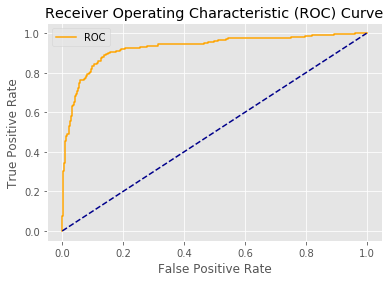

In [129]:
y_predP = lr.predict_proba(dataV_std_Red)
y_predP = y_predP[:, 1]
fper, tper, thresholds = roc_curve(Y_Val, y_predP)
plot_roc_cur(fper, tper)

### <font color='#1C3552'>2.3.2 Random Forest</font>

In [130]:
inicio = time.time()
clf = RandomForestClassifier(random_state=0,
                             criterion= 'gini', 
                             max_depth = 15,
                             min_samples_leaf = 2,
                             n_estimators= 350)
clf.fit(Xtrain, y_train)
y_pred = clf.predict(dataV_std_Red)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(Y_Val, y_pred)
final = time.time()
print("{0:.1%} accuracy on validation set.".format(acc)) 

85.5% accuracy on validation set.


In [131]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, Y_Val))
print("Reporte de Clasificación")
print(classification_report(y_pred, Y_Val))
timer(inicio,final)

Matriz de Confusión
[[1126    7]
 [ 228  262]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.83      0.99      0.91      1133
           1       0.97      0.53      0.69       490

    accuracy                           0.86      1623
   macro avg       0.90      0.76      0.80      1623
weighted avg       0.87      0.86      0.84      1623

Tiempo de ejecución 00:00:22.43


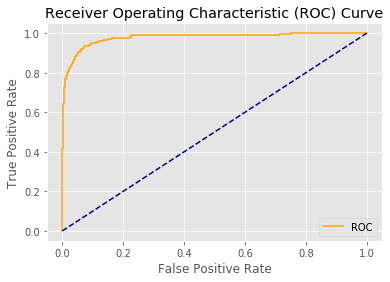

In [132]:
y_predP = clf.predict_proba(dataV_std_Red)
y_predP = y_predP[:, 1]
fper, tper, thresholds = roc_curve(Y_Val, y_predP)
plot_roc_cur(fper, tper)

### <font color='#1C3552'>2.3.3 Máquina de Vectores de Soporte</font>

In [133]:
inicio = time.time()
clf = svm.SVC(kernel='rbf', max_iter=10000)
clf.fit(Xtrain, y_train)
y_pred = clf.predict(dataV_std_Red)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(Y_Val, y_pred)
final = time.time()
print("{0:.1%} accuracy on test set.".format(acc)) 

79.3% accuracy on test set.


In [134]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, Y_Val))
print("Reporte de Clasificación")
print(classification_report(y_pred, Y_Val))
timer(inicio,final)

Matriz de Confusión
[[1029   11]
 [ 325  258]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1040
           1       0.96      0.44      0.61       583

    accuracy                           0.79      1623
   macro avg       0.86      0.72      0.73      1623
weighted avg       0.83      0.79      0.77      1623

Tiempo de ejecución 00:00:30.60


In [135]:
clfP = svm.SVC(kernel='rbf', max_iter=10000, probability=True)
clfP.fit(Xtrain, y_train)
y_predP = clfP.predict_proba(dataV_std_Red)

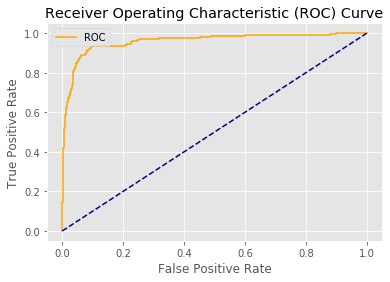

In [136]:
y_predP = y_predP[:, 1]
fper, tper, thresholds = roc_curve(Y_Val, y_predP)
plot_roc_cur(fper, tper)

### <font color='#1C3552'>2.3.4 Adaboost</font>

In [140]:
inicio = time.time()
clf = AdaBoostClassifier(n_estimators=150,
                         random_state=0,
                         learning_rate= 1.,
                         algorithm= 'SAMME.R')
clf.fit(Xtrain, y_train)
y_pred = clf.predict(dataV_std_Red)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(Y_Val, y_pred)
final = time.time()
print("{0:.1%} accuracy on test set.".format(acc)) 

70.7% accuracy on test set.


In [141]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, Y_Val))
print("Reporte de Clasificación")
print(classification_report(y_pred, Y_Val))
timer(inicio,final)

Matriz de Confusión
[[893  14]
 [461 255]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.66      0.98      0.79       907
           1       0.95      0.36      0.52       716

    accuracy                           0.71      1623
   macro avg       0.80      0.67      0.65      1623
weighted avg       0.79      0.71      0.67      1623

Tiempo de ejecución 00:00:16.41


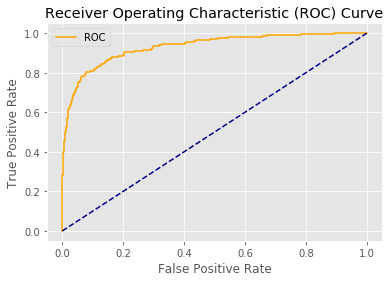

In [142]:
y_predP = clf.predict_proba(dataV_std_Red)
y_predP = y_predP[:, 1]
fper, tper, thresholds = roc_curve(Y_Val, y_predP)
plot_roc_cur(fper, tper)

### <font color='#1C3552'>2.3.5 XGboost</font>

In [143]:
inicio = time.time()
clf =  XGBClassifier(n_estimators= 200,
                             max_depth=5,
                             learning_rate =0.01,
                             subsample=1.0)
clf.fit(Xtrain, y_train)
y_pred = clf.predict(dataV_std_Red)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(Y_Val, y_pred)
final = time.time()
print("{0:.1%} accuracy on test set.".format(acc)) 

74.7% accuracy on test set.


In [144]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, Y_Val))
print("Reporte de Clasificación")
print(classification_report(y_pred, Y_Val))
timer(inicio,final)

Matriz de Confusión
[[969  25]
 [385 244]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.72      0.97      0.83       994
           1       0.91      0.39      0.54       629

    accuracy                           0.75      1623
   macro avg       0.81      0.68      0.68      1623
weighted avg       0.79      0.75      0.72      1623

Tiempo de ejecución 00:00:21.58


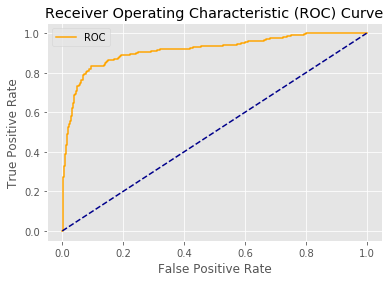

In [145]:
y_predP = clf.predict_proba(dataV_std_Red)
y_predP = y_predP[:, 1]
fper, tper, thresholds = roc_curve(Y_Val, y_predP)
plot_roc_cur(fper, tper)

### <font color='#1C3552'>2.3.6 Histogram-based Gradient Boosting Classification Tree</font>

In [146]:
inicio = time.time()
clf =  HistGradientBoostingClassifier()
clf.fit(Xtrain, y_train)
y_pred = clf.predict(dataV_std_Red)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(Y_Val, y_pred)
final = time.time()
print("{0:.1%} accuracy on validation set.".format(acc)) 

74.4% accuracy on validation set.


In [147]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, Y_Val))
print("Reporte de Clasificación")
print(classification_report(y_pred, Y_Val))
timer(inicio,final)

Matriz de Confusión
[[945   7]
 [409 262]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.70      0.99      0.82       952
           1       0.97      0.39      0.56       671

    accuracy                           0.74      1623
   macro avg       0.84      0.69      0.69      1623
weighted avg       0.81      0.74      0.71      1623

Tiempo de ejecución 00:00:02.87


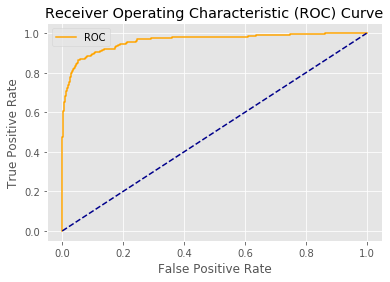

In [148]:
y_predP = clf.predict_proba(dataV_std_Red)
y_predP = y_predP[:, 1]
fper, tper, thresholds = roc_curve(Y_Val, y_predP)
plot_roc_cur(fper, tper)

 ## <font color='#1C3552'>2.4 Comparacdión de resultados</font>
 
 Compare estos resultados con los clasificadores de la parte anterior. ¿Qué hallazgos hay?

La siguiente tabla muestra los resultados obtenidos por los diferentes modelos

|Modelos|Accuracy Train<br>Cross-Validation|Accuracy Test<br>All Variables|Accuracy Test<br>Reduced Variables|Accuracy Validation Data<br>Reduced Variables|Recall Class = 1|
| :--- | :---: | :---: |:---:|:---:|:--:|
|**Regresión Logística**| 88.96%| 89.8% | 88.2% | 77.4% |42%|
|**Bosques Aleatorios**| 90.15%| 89.8% |     90.2%  |   **85.5%**|**53%**|
|**Máquina de Vectores de Soporte**| **91.01%**|**91.7%** |   **91.0%**   |   **79.3%**|**44%**|
|**Adaboost**| 89.52% |88.5%   |   88.3%   |   70.7%|39%|
|**XGBoost**| 90.17% |89.4%  |   89.0%   |  74.7%|38%|
|**Histogram-based Gradient Boosting Classification Tree**| **93.04%** |**94.7%**  |   **93.2%**   |  **74.4%**|39%|

El modelo Histogram Based Gradient Boosting Classificarion Tree presentó resultados muy favorables durante la etapa de cross validation, y puebas sobre los datos de test, con todas las variables y con variables reducidas.  Sin embargo en los datos de validación, su accuracy disminuyó mucho, lo cual indica que el modelo tuvo overfitting en los datos de prueba y que tal vez los datos de validación tienen alguna difererencia en sus distribuciones de datos respecto a los datos de entrenamiento.

El modelo de Bosques Aleatorios no presentó un desempeño superior a los demás modelos durante la etapa de entrenamiento, pero en los datos de validación tuvó el mejor desempeño.

El modelos de Clasificación con Máquinas de Vectores de Soporte presentó el segundo mejor desempoeño, en las etapas de entremiento y validación, por lo que presentó resultados más consistentes.  Se elegiría este modelo para implementar en producción.

Sin embargo dado el desbalance de los datos de validación, la medida de accuracy es engañosa.  Para el problema en cuestión, se busca predecir pepetidos con capacidad antimicrobiana y en los datos de validación hay pocos casos con esta caracteristica, 269, frente a 1354 casos de peptidos sin capacidades antimibrobianas.

En este caso la principal medida de desempeño debería ser el recall para los casos de class = 1, es decir, la capacidad del modelo para identificar los verdaderos casos de peptidos antimicrobianos.

Bajo la medida de Recall, también los modelos SVM y Bosques aleatorios presentan un mejor desempeño que los demás, pero aún les falta potencia para clasificar un peptido como antibicrobiano, dado que en realidad lo es. Se puede decir que su capacidad predictiva condicional respecto al hecho que un peptido sea antimicrobiano es solo del 53%, pero aun así es una herramienta que mejora la eficiencia en la busqueda de potenciales peptidos antimicrobiano dado que son muy potentes en descartar los casos verdaderos de peptidos que no son antimicrobianos.